In [3]:
# Wczytanie pakietów podstawowych
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
# Wczytanie danych
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
domy = pd.read_csv("domy.csv", sep=',', dtype=dtype_dict)
domy

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0       3.0       1.00   
1      6414100192  20141209T000000  538000.0       3.0       2.25   
2      5631500400  20150225T000000  180000.0       2.0       1.00   
3      2487200875  20141209T000000  604000.0       4.0       3.00   
4      1954400510  20150218T000000  510000.0       3.0       2.00   
...           ...              ...       ...       ...        ...   
21608  0263000018  20140521T000000  360000.0       3.0       2.50   
21609  6600060120  20150223T000000  400000.0       4.0       2.50   
21610  1523300141  20140623T000000  402101.0       2.0       0.75   
21611  0291310100  20150116T000000  400000.0       3.0       2.50   
21612  1523300157  20141015T000000  325000.0       2.0       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0           1180.0      5650     1.0           0     0  ...      7   
1           2570.0      7242     2.0           0     0  ...      7   
2            770.0     10000     1.0           0     0  ...      6   
3           1960.0      5000     1.0           0     0  ...      7   
4           1680.0      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608       1530.0      1131     3.0           0     0  ...      8   
21609       2310.0      5813     2.0           0     0  ...      8   
21610       1020.0      1350     2.0           0     0  ...      7   
21611       1600.0      2388     2.0           0     0  ...      8   
21612       1020.0      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257         1340.0      5650.0  
1     -122.319         1690.0      7639.0  
2     -122.233         2720.0      8062.0  
3     -122.393         1360.0      5000.0  
4     -122.045         1800.0      7503.0  
...        ...            ...         ...  
21608 -122.346         1530.0      1509.0  
21609 -122.362         1830.0      7200.0  
21610 -122.299         1020.0      2007.0  
21611 -122.069         1410.0      1287.0  
21612 -122.299         1020.0      1357.0  

[21613 rows x 21 columns]

In [5]:
numer_indeksu = 290926
ceny = domy['price']
#domy.drop('price', axis=1, inplace=True)   # To wykona się w dalszej części
#domy_train, domy_test, ceny_train, ceny_test = train_test_split(domy, ceny, test_size=0.33, random_state=numer_indeksu)   # To wykona się w dalszej części
cechy = domy.columns.values
cechy 

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype=object)

In [6]:
#id to jakiś numer katalogowy, który nie wpływa na cenę.
domy.drop('id', axis=1, inplace=True)
#Podobnie jak id, wydaje mi się, że to jest data np. wpisania do katalogu. Istotne daty są w parametrach yr_built i yr_renovated.
domy.drop('date', axis=1, inplace=True)
#Poniższe dane określają lokalizację domu, ale trudno na ich podstawie określić atrakcyjność lokalizacji, która mogłaby wpłynąć na cenę.
domy.drop('zipcode', axis=1, inplace=True) #amerykański kod pocztowy
domy.drop('lat', axis=1, inplace=True)
domy.drop('long', axis=1, inplace=True)
#sqft_living15 i sqft_lot15 określają powierzchnie sąsiadujących działek, więc założę, że ich wartości mogą zostać pominięte.
domy.drop('sqft_living15', axis=1, inplace=True)
domy.drop('sqft_lot15', axis=1, inplace=True)
domy_train, domy_test, ceny_train, ceny_test = train_test_split(domy, ceny, test_size=0.33, random_state=numer_indeksu)
domy

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0       3.0       1.00       1180.0      5650     1.0   
1      538000.0       3.0       2.25       2570.0      7242     2.0   
2      180000.0       2.0       1.00        770.0     10000     1.0   
3      604000.0       4.0       3.00       1960.0      5000     1.0   
4      510000.0       3.0       2.00       1680.0      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0       3.0       2.50       1530.0      1131     3.0   
21609  400000.0       4.0       2.50       2310.0      5813     2.0   
21610  402101.0       2.0       0.75       1020.0      1350     2.0   
21611  400000.0       3.0       2.50       1600.0      2388     2.0   
21612  325000.0       2.0       0.75       1020.0      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
1               0     0          3      7        2170            400   
2               0     0          3      6         770              0   
3               0     0          5      7        1050            910   
4               0     0          3      8        1680              0   
...           ...   ...        ...    ...         ...            ...   
21608           0     0          3      8        1530              0   
21609           0     0          3      8        2310              0   
21610           0     0          3      7        1020              0   
21611           0     0          3      8        1600              0   
21612           0     0          3      7        1020              0   

       yr_built  yr_renovated  
0          1955             0  
1          1951          1991  
2          1933             0  
3          1965             0  
4          1987             0  
...         ...           ...  
21608      2009             0  
21609      2014             0  
21610      2009             0  
21611      2004             0  
21612      2008             0  

[21613 rows x 14 columns]

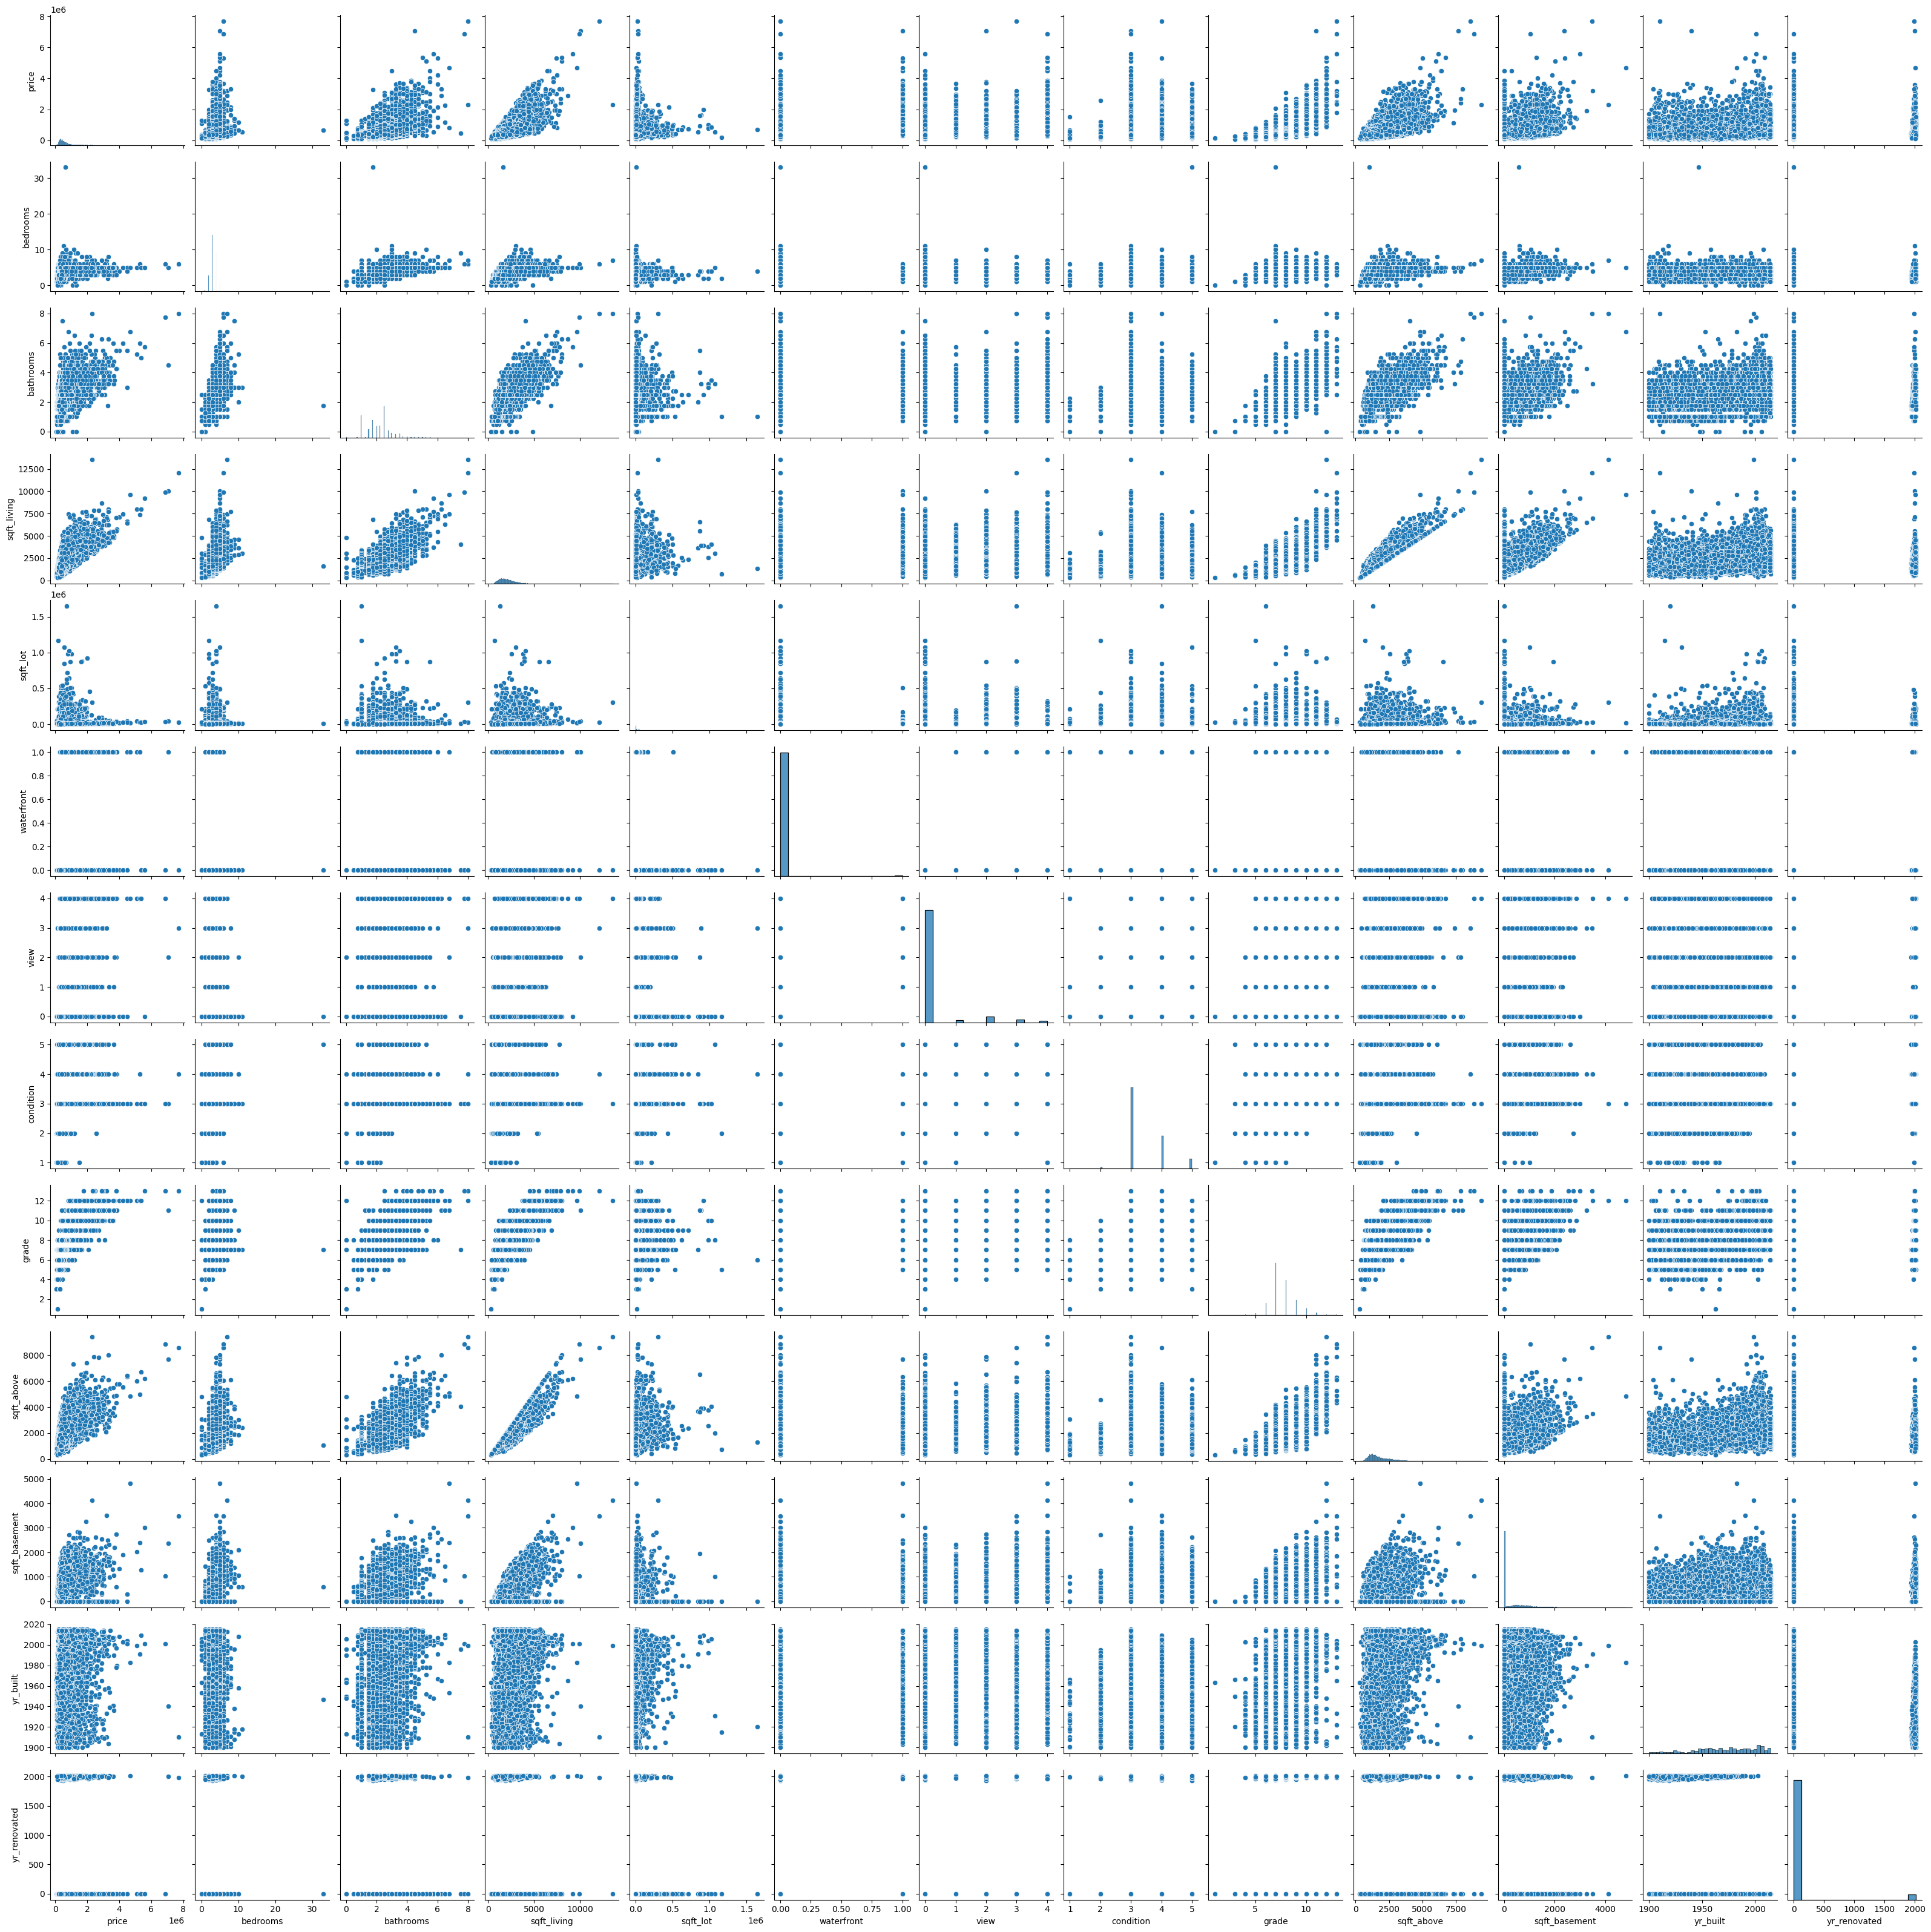

In [6]:
#Wizualizacja
sn.pairplot(domy)

Część danych nie prezentuje rozkładu normalnego. Są to dane albo wskazujące na obecność czegoś (piwnicy, widoku na morze, rozmiar piwnicy), ale też równomierny rozkład roku budowy domów. W wielu przypadkach występowanie wartości zerowych jest dominujące.

Wartości takie jak sqft_living, grade, condition, bathroom czy bedrooms są mniej lub bardziej zbliżone do rozkładu normalnego. Przy niektórych z tych parametrów widoczna jest prawoskośność rozkładu.


Axes(0.125,0.11;0.62x0.77)
                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308350   0.525138     0.702035  0.089661  0.256794   
bedrooms       0.308350  1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.525138  0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702035  0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.256794  0.175429   0.500653     0.353949 -0.005201  1.000000   
waterfront     0.266369 -0.006582   0.063744     0.103818  0.021604  0.023698   
view           0.397293  0.079532   0.187737     0.284611  0.074710  0.029444   
condition      0.036362  0.028472  -0.124982    -0.058753 -0.008958 -0.263768   
grade          0.667434  0.356967   0.664983     0.762704  0.113621  0.458183   
sqft_above     0.605567  0.477600   0.685342     0.876597  0.183512  0.523885   
s

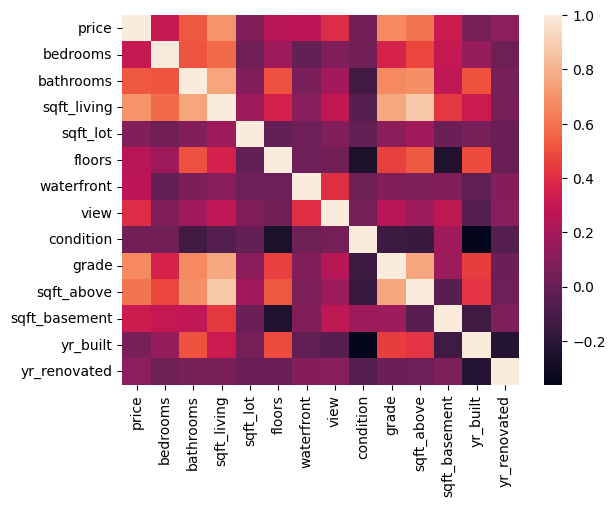

In [7]:
#Wzajemne korelacje parametrów
print(sn.heatmap(domy.corr())) #annot = domy.corr() <- To wypisuje korelacje na Heatmapie
print(domy.corr())

In [7]:
#Zaokrąglenie ilości łazienek. W rezultacie niektóre domy nie będą miały łazienki, ale z drugiej strony w domach nie będzie występować np. 3/4 łazienki.
bathrooms_rounded = domy.bathrooms.apply(lambda x: round(x,0))
#print(bathrooms_rounded)

#Ilość pokoi
bed_bath_rooms = domy.bathrooms * domy.bedrooms
#print(bed_bath_rooms)

#Kwadrat jakości/stanu domu, dla zwiększenia istotności parametru
condition_sq = domy.condition.apply(lambda x: x**2)
#print(condition_sq)

#Dwa najlepiej skorelowane parametry. Z informacji znalezionych w internecie wynika, że 
#sqft_above jest cenione wyżej niż sqft_living, więc ten pierwszy parametr dostaje mnożnik dla zwiększenia istotności.
sqft_combined = domy.sqft_above.apply(lambda x: x*1.2) * domy.sqft_living
#print(sqft_combined)

#Iloczyn pięter i widoku. Może w przypadku dobrego widoku, wysokie piętro jest atutem?
floors_view = domy.floors * domy.view
#print(floors_view)

In [8]:
domy_nowe_cechy = pd.DataFrame()
domy_nowe_cechy['bathrooms_rounded'] = bathrooms_rounded
domy_nowe_cechy['bed_bath_rooms'] = bed_bath_rooms
domy_nowe_cechy['condition_sq'] = condition_sq
domy_nowe_cechy['sqft_combined'] = sqft_combined
domy_nowe_cechy['floors_view'] = floors_view
domy_nowe_cechy['price'] = ceny
print(domy_nowe_cechy)

       bathrooms_rounded  bed_bath_rooms  condition_sq  sqft_combined  \
0                    1.0            3.00             9      1670880.0   
1                    2.0            6.75             9      6692280.0   
2                    1.0            2.00             9       711480.0   
3                    3.0           12.00            25      2469600.0   
4                    2.0            6.00             9      3386880.0   
...                  ...             ...           ...            ...   
21608                2.0            7.50             9      2809080.0   
21609                2.0           10.00             9      6403320.0   
21610                1.0            1.50             9      1248480.0   
21611                2.0            7.50             9      3072000.0   
21612                1.0            1.50             9      1248480.0   

       floors_view     price  
0              0.0  221900.0  
1              0.0  538000.0  
2              0.0  180000.0  

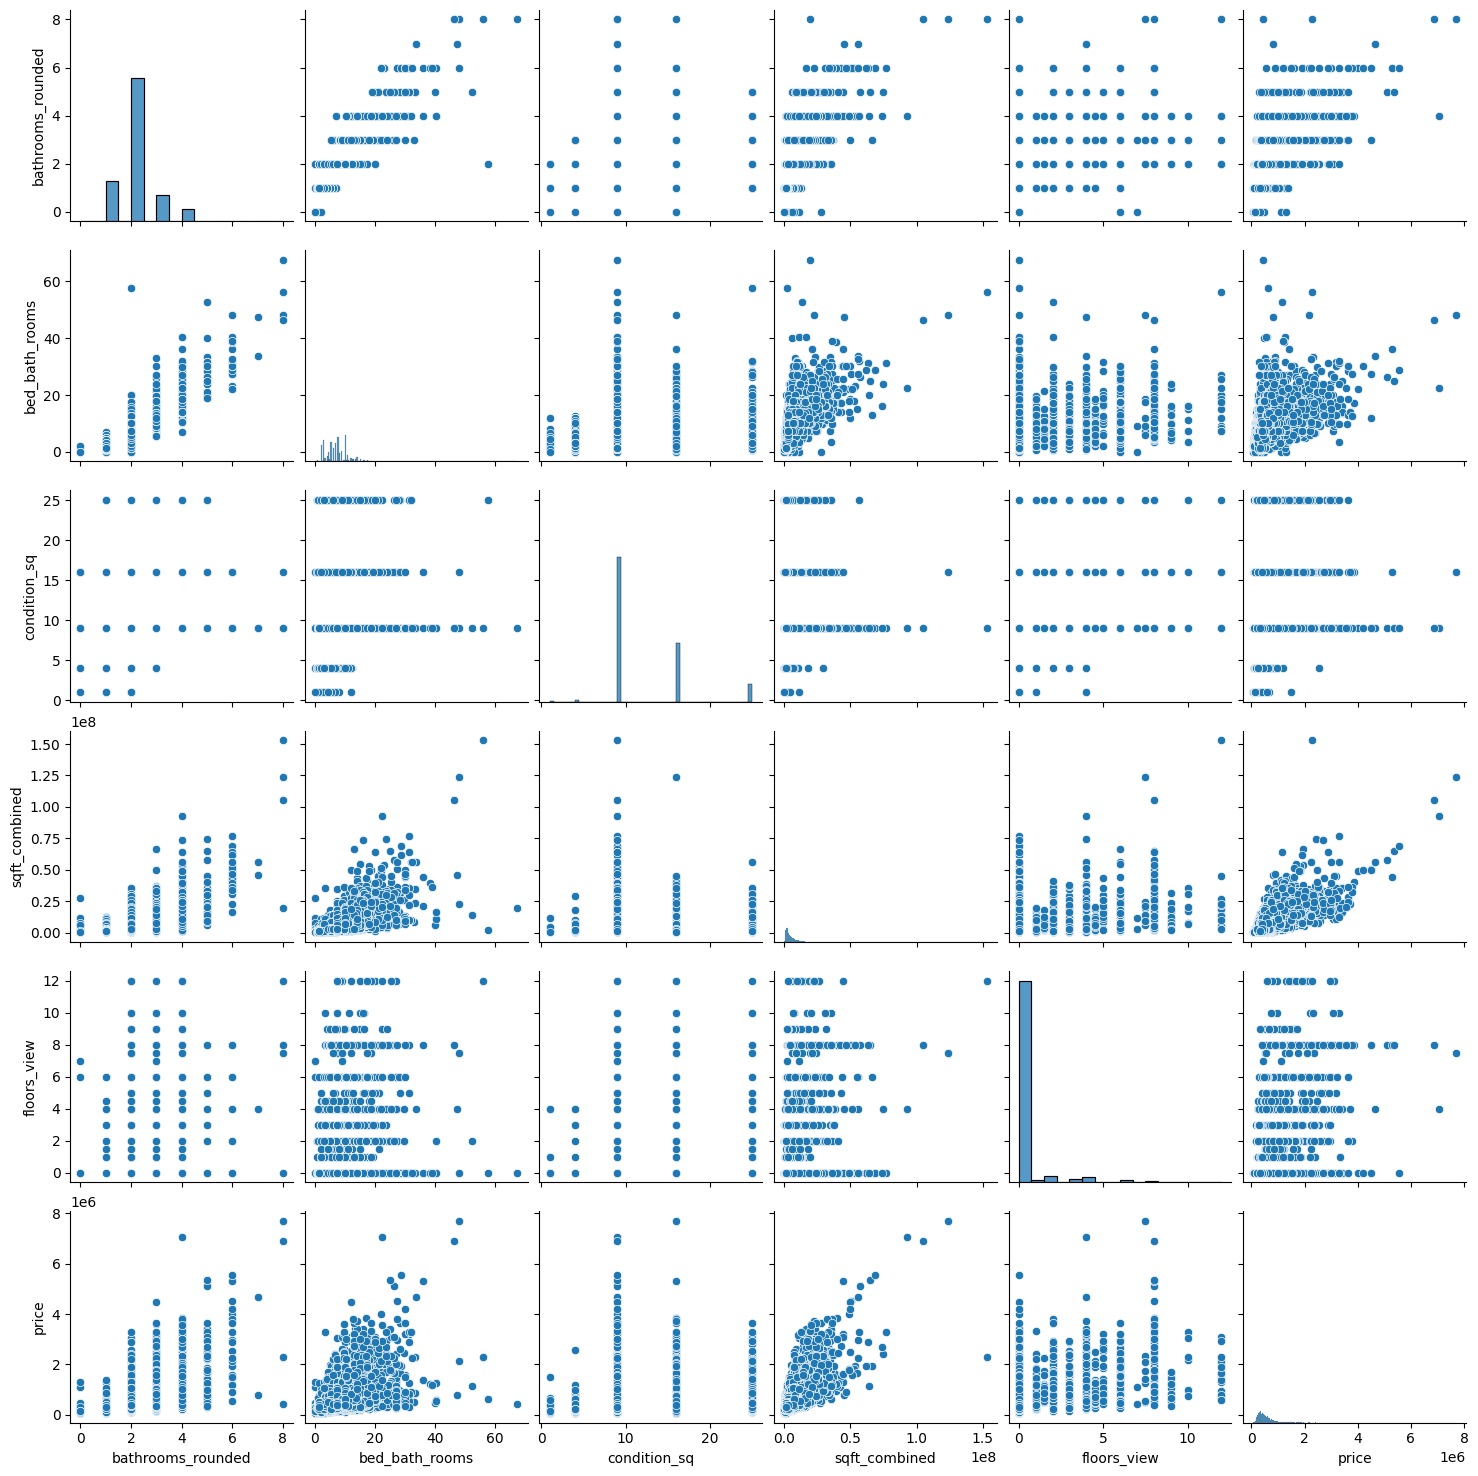

In [10]:
sn.pairplot(domy_nowe_cechy)

                   bathrooms_rounded  bed_bath_rooms  condition_sq  \
bathrooms_rounded           1.000000        0.833247     -0.066554   
bed_bath_rooms              0.833247        1.000000     -0.070135   
condition_sq               -0.066554       -0.070135      1.000000   
sqft_combined               0.624077        0.690331     -0.111205   
floors_view                 0.238377        0.206692      0.023545   
price                       0.518912        0.516641      0.037287   

                   sqft_combined  floors_view     price  
bathrooms_rounded       0.624077     0.238377  0.518912  
bed_bath_rooms          0.690331     0.206692  0.516641  
condition_sq           -0.111205     0.023545  0.037287  
sqft_combined           1.000000     0.286027  0.698087  
floors_view             0.286027     1.000000  0.424055  
price                   0.698087     0.424055  1.000000  


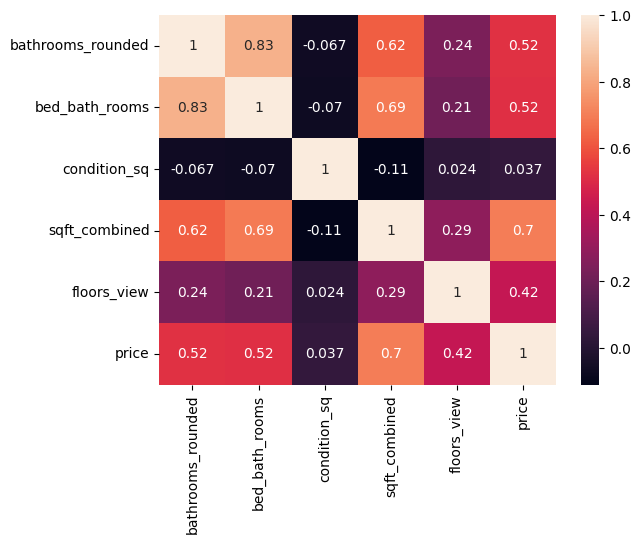

In [11]:
sn.heatmap(domy_nowe_cechy.corr(), annot = domy_nowe_cechy.corr())
print(domy_nowe_cechy.corr())

In [7]:
#Funkcja pseudo-inwersji wykorzystująca funckję z numpy z przygotowaniem danego wektora obserwacji cechy opisującej.
def pseudoinverse(input):
    ones = np.ones((len(input)))
    a = np.array((input))
    A = np.vstack((ones, a))
    return np.linalg.pinv(A) #pseudoinwersja

sqft_living


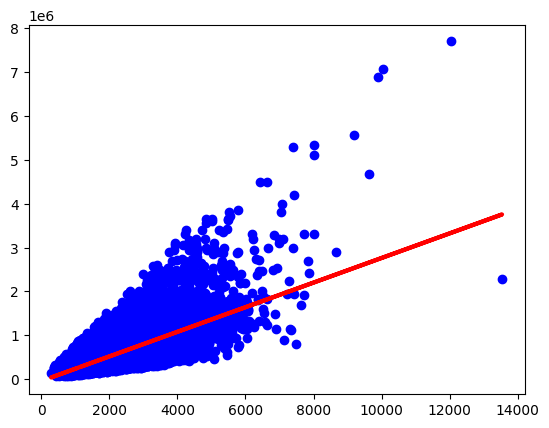

sqft_combined


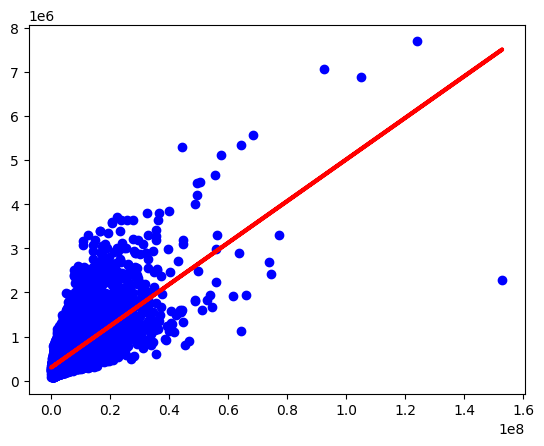

grade


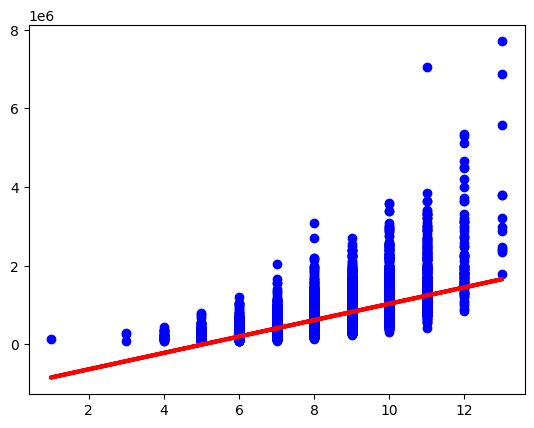

In [30]:
#trzy najbardziej skorelowane cechy
#1 sqft_living = 0,702035
#2 sqft_combined = 0,698087
#3 grade = 0,667434

Ainv = pseudoinverse(domy.sqft_living) # Ainv.shape => 21613x2
W = np.matmul(Ainv.T, ceny) # 2x21613 * 21613x1 => 2x1
line_sqft_living = domy.sqft_living.apply(lambda x: x*W[1] + W[0])

Ainv = pseudoinverse(domy_nowe_cechy.sqft_combined)
W = np.matmul(Ainv.T, ceny)
line_sqft_combined = domy_nowe_cechy.sqft_combined.apply(lambda x: x*W[1] + W[0])

Ainv = pseudoinverse(domy.grade)
W = np.matmul(Ainv.T, ceny)
line_grade = domy.grade.apply(lambda x: x*W[1] + W[0])

print("sqft_living")
plt.scatter(domy.sqft_living, ceny,  color='blue')
plt.plot(domy.sqft_living, line_sqft_living, color='red', linewidth=3)
plt.show()

print("sqft_combined")
plt.scatter(domy_nowe_cechy.sqft_combined, ceny,  color='blue')
plt.plot(domy_nowe_cechy.sqft_combined, line_sqft_combined, color='red', linewidth=3)
plt.show()

print("grade")
plt.scatter(domy.grade, ceny,  color='blue')
plt.plot(domy.grade, line_grade, color='red', linewidth=3)
plt.show()

In [9]:
# Sum Square Error
def SSE(pred_y, exp_y):
    error_vector = exp_y - pred_y
    error_vector = error_vector.apply(lambda x: x**2)
    return np.sum(error_vector)

In [10]:
# funkcja obliczająca gradient wag
def step_reg(input_init, exp_y, weights, iter):
    pred_y = np.empty((input_init.shape[1]))
    input = np.transpose(input_init)
    grad_vect = np.zeros((len(weights))) # wektor gradientów
    i = 0
    j = 0
    while j < iter:
        pred_y[j] = np.matmul(input[j], weights)
        error = exp_y[j] - pred_y[j]
        while i < len(grad_vect):
            grad_vect[i] = 2 * error * input[j][i] # GRADIENT danej wagi dla danej obserwacji
            i += 1
            weights += 0.001 * grad_vect
        j += 1
        i = 0
    return weights

In [11]:
def my_regression(input, output, W):
    ones = np.ones(input.shape[0])
    input_init = np.vstack((ones, input.T))
    line = np.matmul(input_init.T, W)
    
    W = step_reg(input_init, output, W, 21613) # 21613 to liczba obserwacji w całym zbiorze. Tutaj wszystkie są wykrozystywane do regresji.

    line = np.matmul(input_init.T, W)
    print(SSE(line, output))
    #print(W)

    # Rysowanie wykresów
    plt.scatter(input, output,  color='blue')
    plt.plot(input, line, color='red', linewidth=3)
    plt.show()
    
    return W

In [12]:
# Odrzucam ceny z DataFramów, ponieważ już nie są tu potrzebne.
domy.drop('price', axis=1, inplace=True)
domy_nowe_cechy.drop('price', axis=1, inplace=True)

In [13]:
# Skalowanie danych - dzielenie wartości przez największą wartość występującą w kolumnie danej cechy.
# Ten zabieg jest przede wszystkim po to, żeby nie dochodziło do przepełniania zmiennych i błędów z tym związanych.
for i in domy:
    highest = 0
    for j in domy[i]:
        if j > highest:
            highest = j
    domy[i] = domy[i].apply(lambda x: x/highest)

for i in domy_nowe_cechy:
    highest = 0
    for j in domy_nowe_cechy[i]:
        if j > highest:
            highest = j
    domy_nowe_cechy[i] = domy_nowe_cechy[i].apply(lambda x: x/highest)

for i in domy_train:
    highest = 0
    for j in domy_train[i]:
        if j > highest:
            highest = j
    domy_train[i] = domy_train[i].apply(lambda x: x/highest)

bedrooms
3006095127998334.5


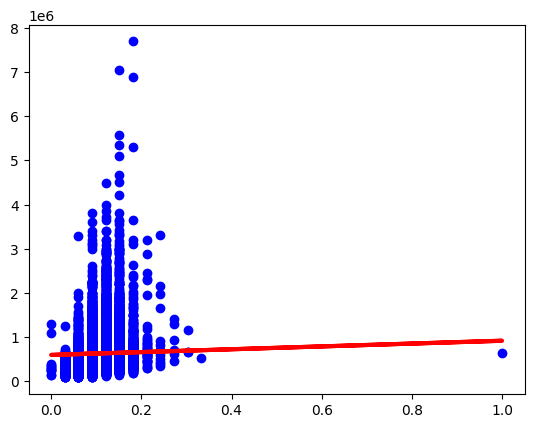

bathrooms
2267177451344043.5


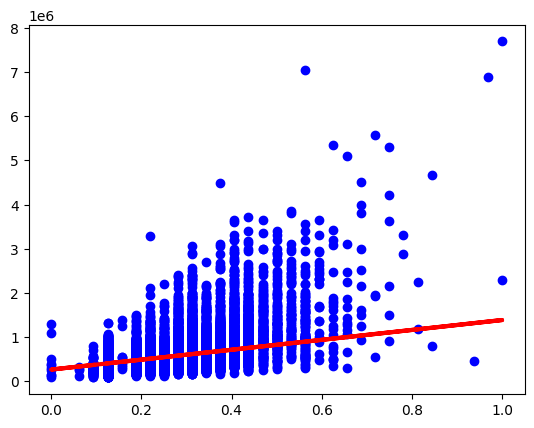

sqft_living
2177660998324359.5


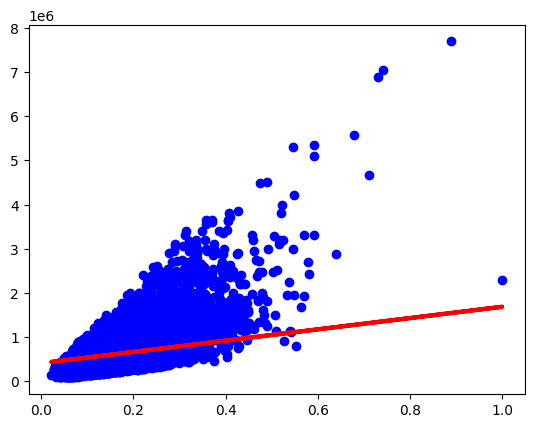

sqft_lot
3046290113940456.5


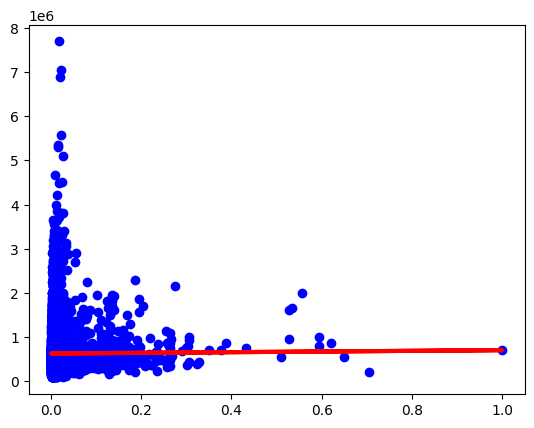

floors
2729521529294215.0


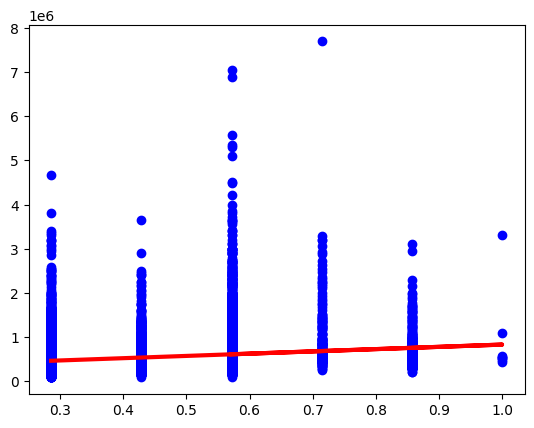

waterfront
2905195909292139.0


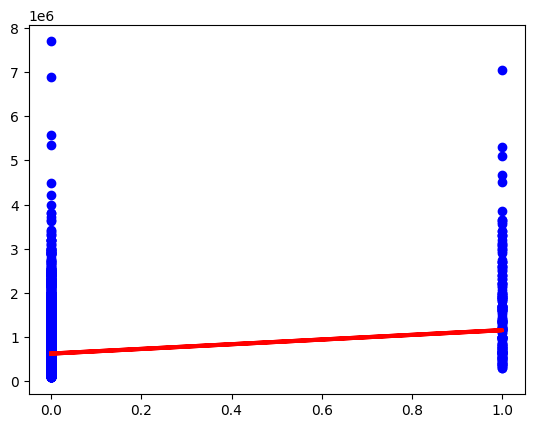

view
2646066588049535.5


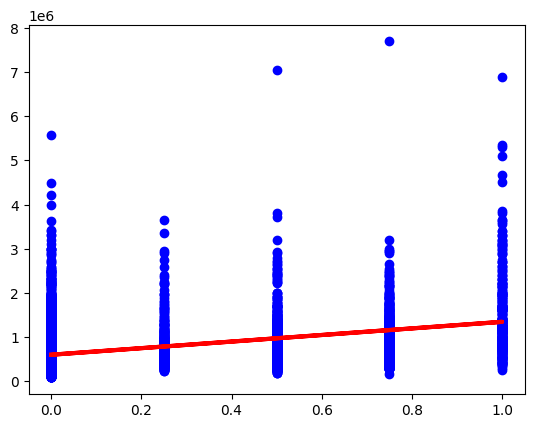

condition
3160256260488326.0


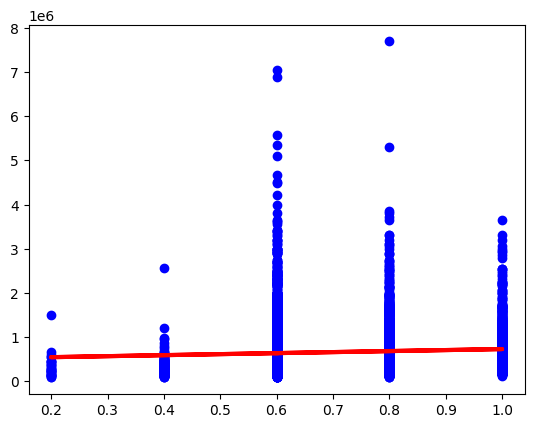

grade
2007110603791106.8


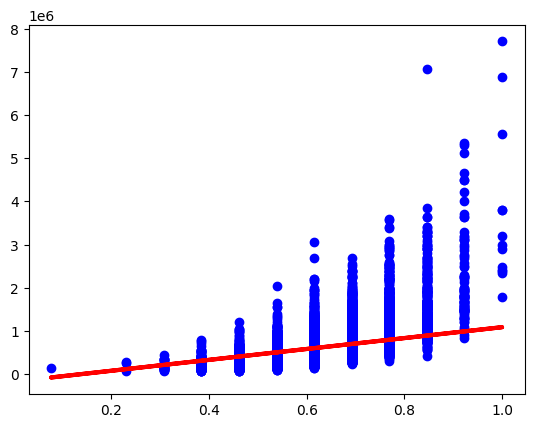

sqft_above
2141239384392379.0


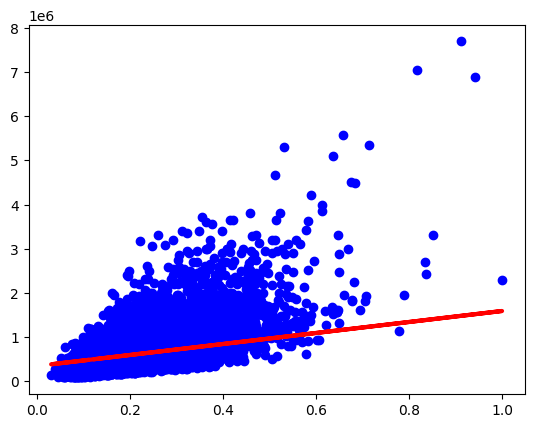

sqft_basement
2866577337950771.5


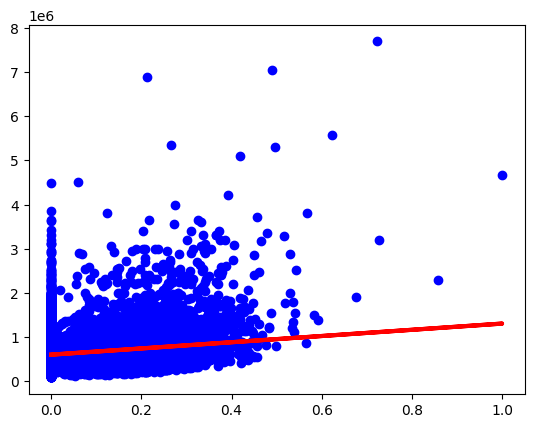

yr_built
3096388201458915.0


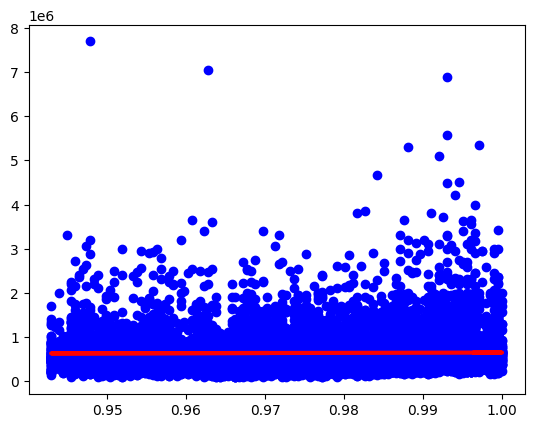

yr_renovated
3034187584865471.5


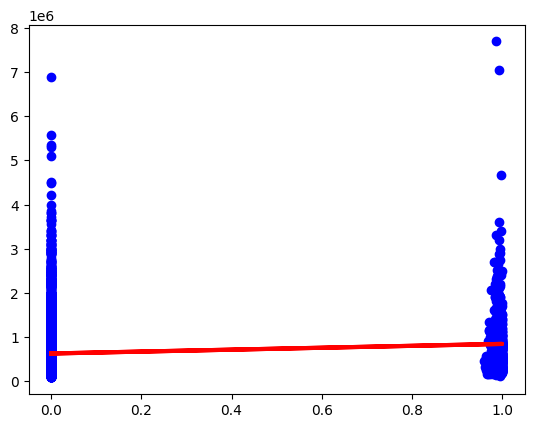

bathrooms_rounded
2302815100450193.5


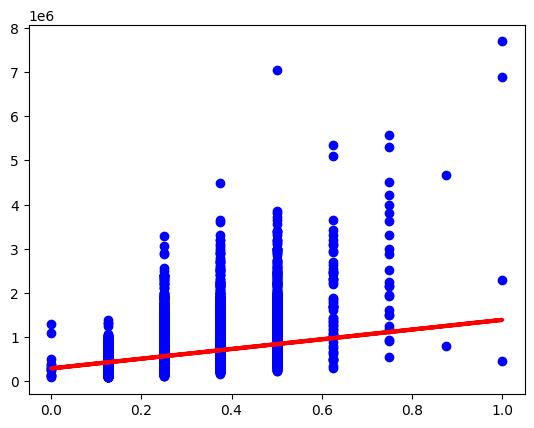

bed_bath_rooms
2584917819286865.0


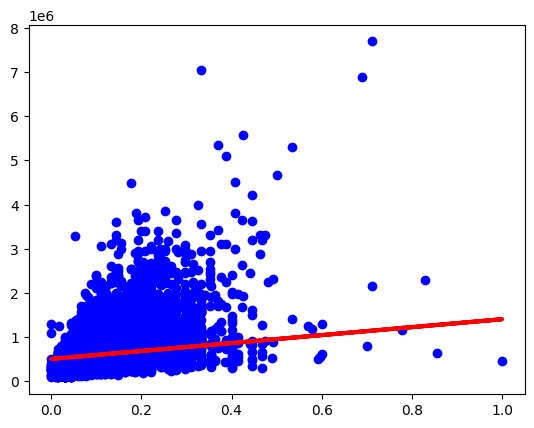

condition_sq
3124717689738289.0


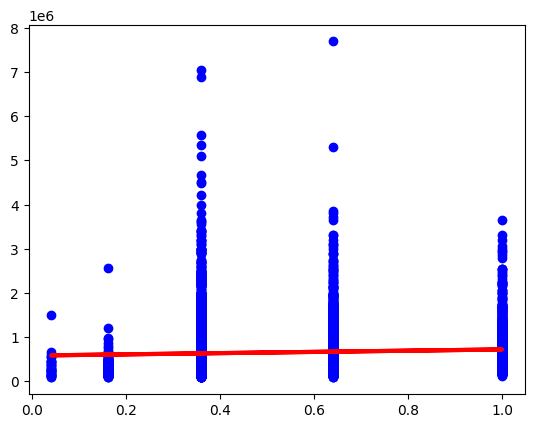

sqft_combined
2735009048389540.0


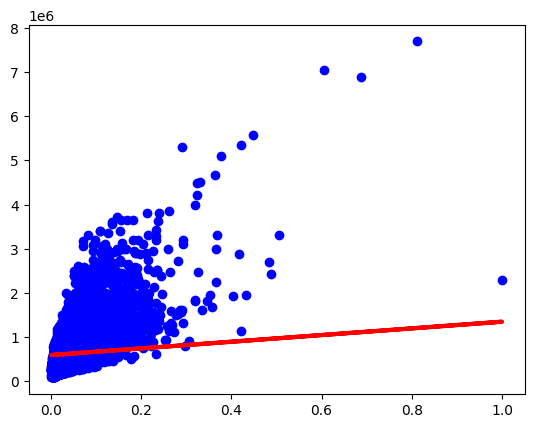

floors_view
2610585985545423.0


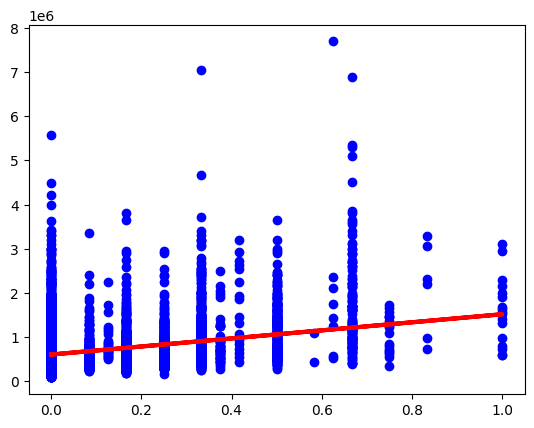

In [14]:
for i in domy:
    W = np.zeros([2])
    print(i)
    W = my_regression(domy[i], ceny, W)

for i in domy_nowe_cechy:
    W = np.zeros([2])
    print(i)
    W = my_regression(domy_nowe_cechy[i], ceny, W)

In [15]:
# funkcja obliczająca gradient wag z LASSO
def step_lasso(input_init, exp_y, weights, iter, lasso_rate):
    ones = np.ones((input_init.shape[1])) #len(input_init)
    pred_y = np.empty((input_init.shape[1]))
    input = np.transpose(input_init)
    #input = np.transpose(np.vstack((ones, input_init))) # wektor wejściowy(zmiennej objaśniającej) z kolumną jedynek
    grad_vect = np.zeros((len(weights))) # wektor gradientów
    i = 0
    j = 0
    while j < iter:
        pred_y[j] = np.matmul(input[j], weights)
        error = exp_y[j] - pred_y[j]
        while i < len(grad_vect):
            grad_vect[i] = 2 * error * input[j][i] + lasso_rate * np.absolute(weights[i]) # TU JEST ZMIANA w porównaniu ze zwykłym spadkiem gradientu
            i += 1
            weights += 0.001 * grad_vect
        j += 1
        i = 0
    return weights

In [16]:
def my_lasso_regression(input, output, W):
    ones = np.ones(input.shape[0])
    input_init = np.vstack((ones, input.T))
    line = np.matmul(input_init.T, W) # line = input.apply(lambda x: x*W[1] + W[0])

    lasso_rate = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.01, 0.03, 0.1]
    for rate in lasso_rate:
        W = step_lasso(input_init, output, W, len(input),rate)

        line = np.matmul(input_init.T, W) # line = input.apply(lambda x: x*W[1] + W[0])
        print(SSE(line, output))
        #print(W)
    
        # Rysowanie wykresów
        plt.scatter(input, output,  color='blue')
        plt.plot(input, line, color='red', linewidth=3)
        plt.show()
    
    return W

In [17]:
domy_train.drop('price', axis=1, inplace=True)
domy_test.drop('price', axis=1, inplace=True)

bedrooms
1942039761163425.5


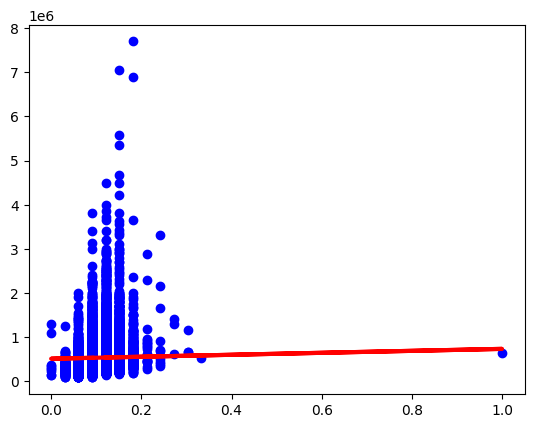

1928547886290945.5


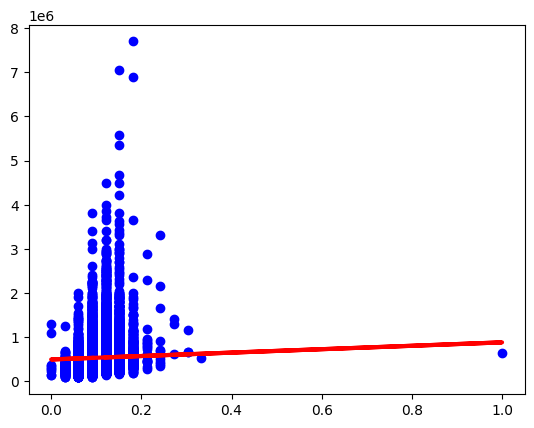

1915475314027510.8


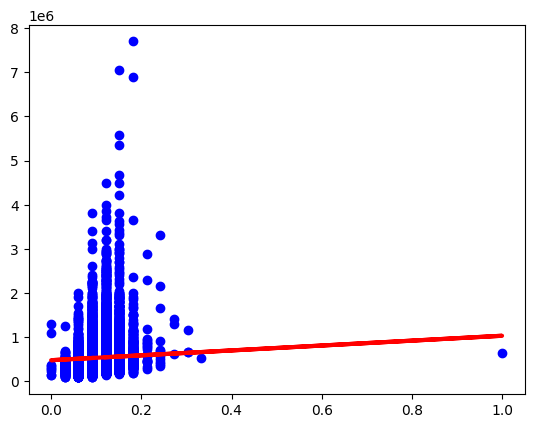

1900673200470737.0


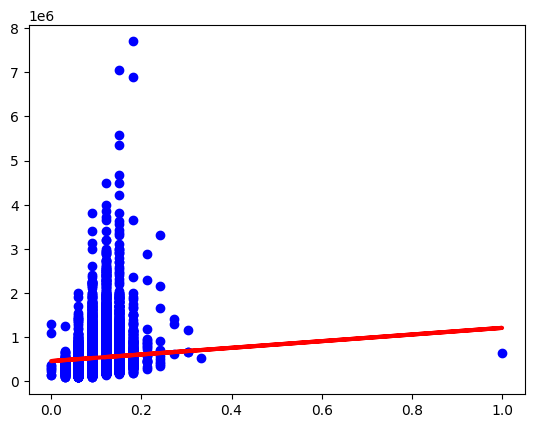

1874036217279754.5


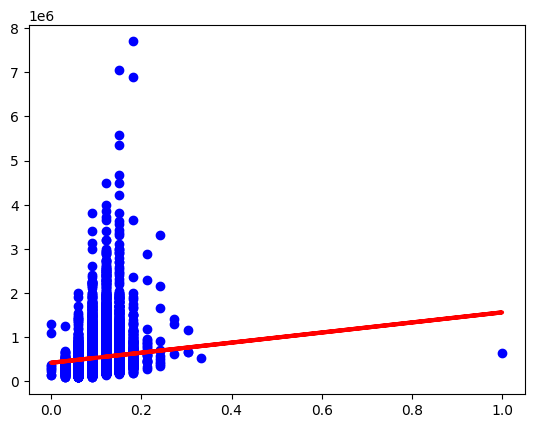

1801408848520672.5


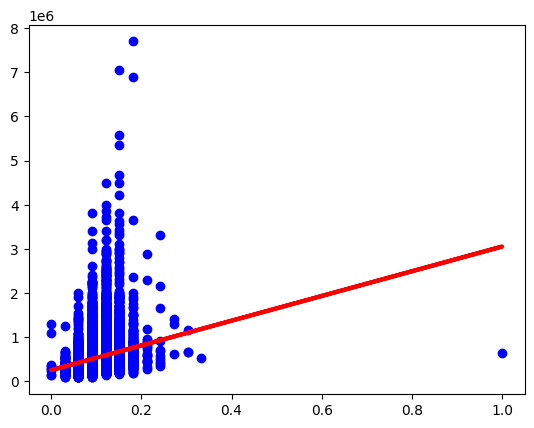

1791441931406895.5


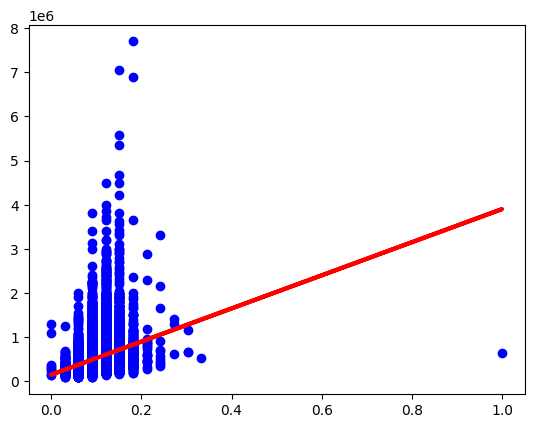

2071037536081983.8


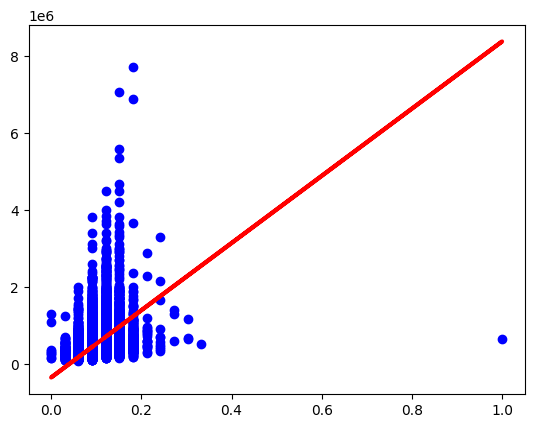

2.50951939080242e+17


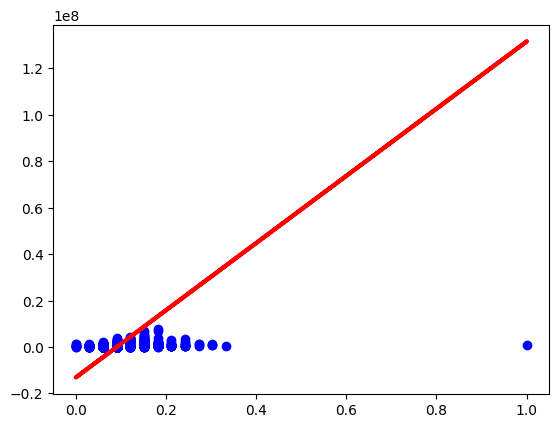

bathrooms
1590296167347741.0


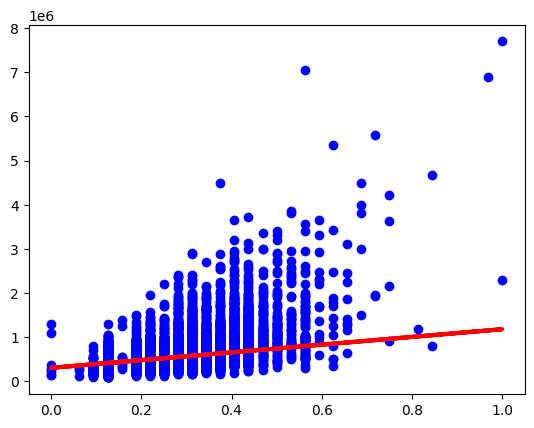

1479328910479712.0


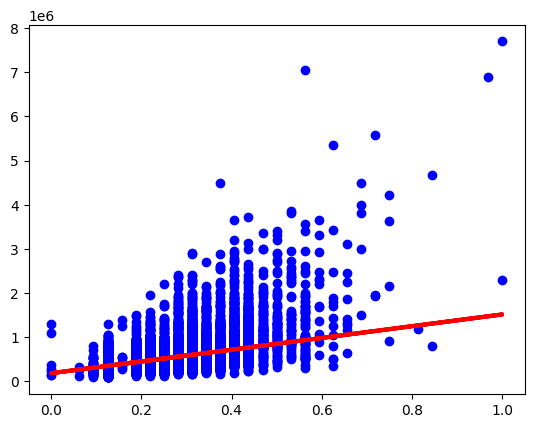

1436865139533975.0


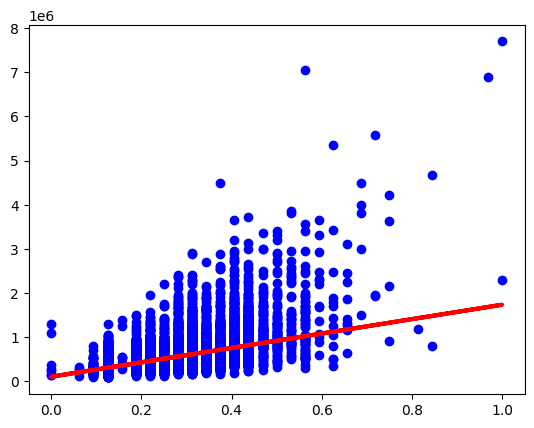

1419493052678334.0


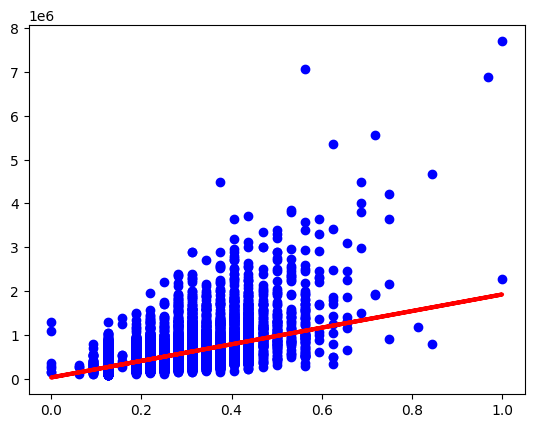

1438082955210701.8


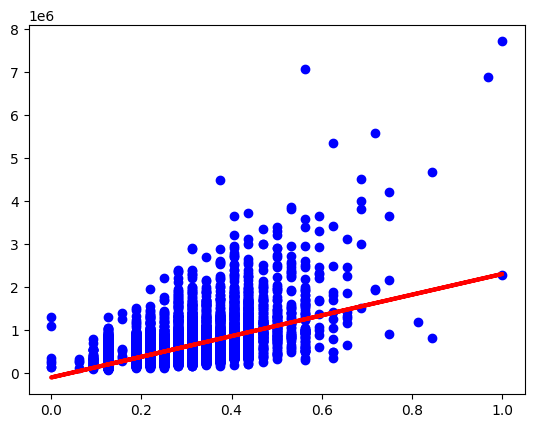

2174664769845141.8


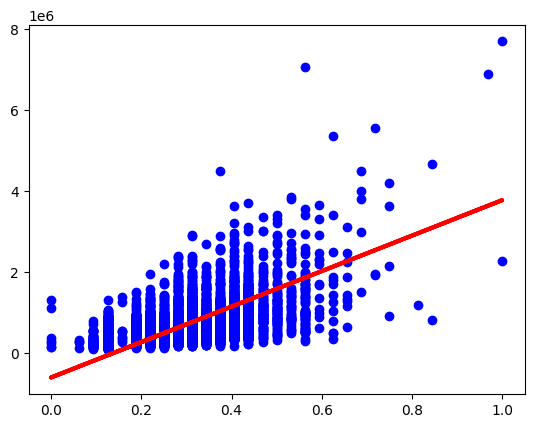

2146163256619233.5


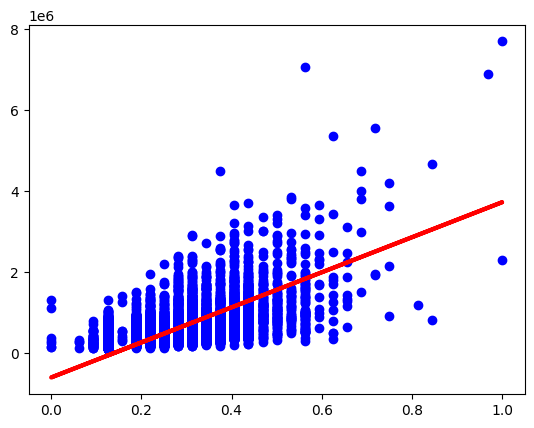

4610968692970344.0


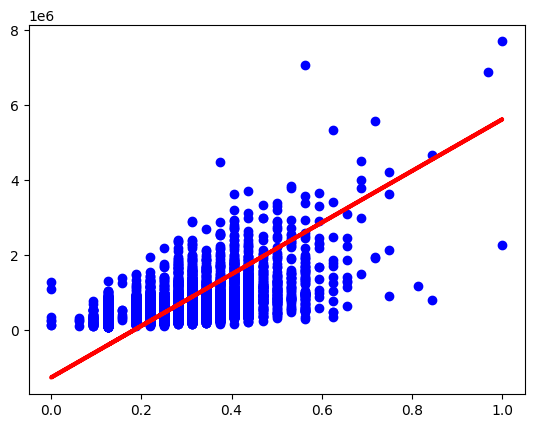

4.373929579986875e+17


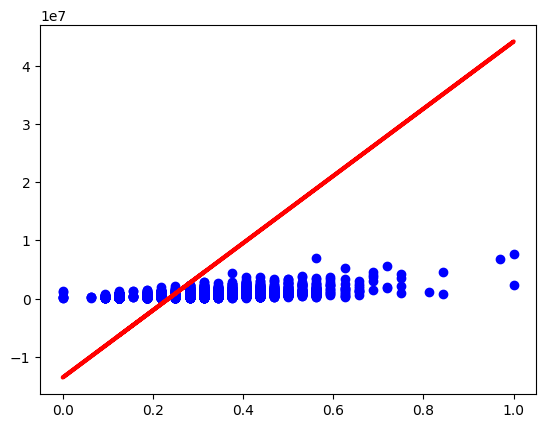

sqft_living
1554786281699370.8


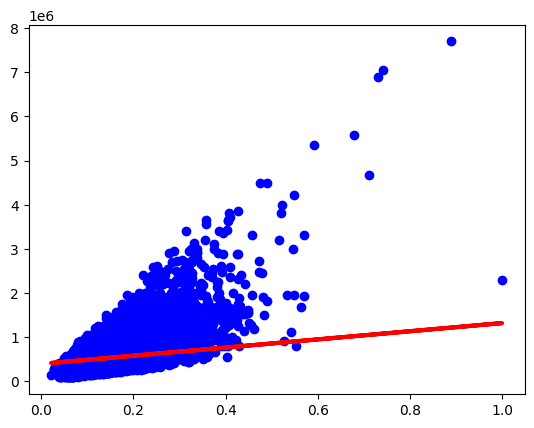

1333062024384993.8


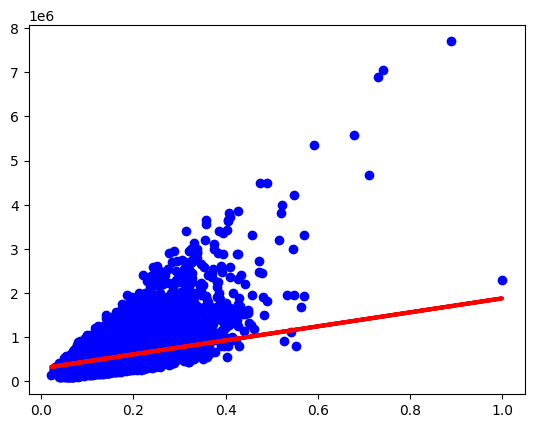

1192833073881933.5


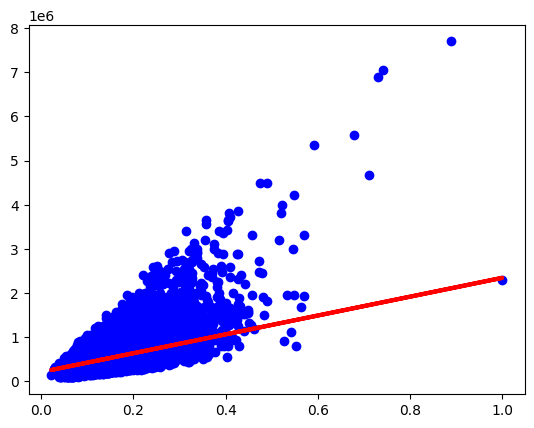

1090635462397452.9


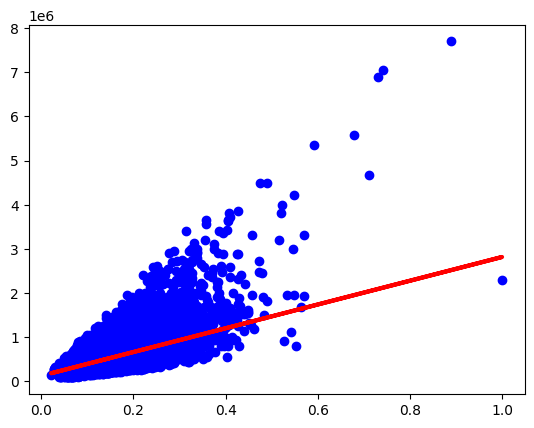

1009333187284679.4


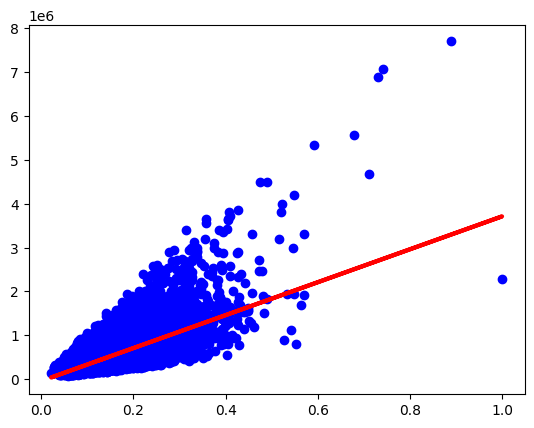

2208356081046129.5


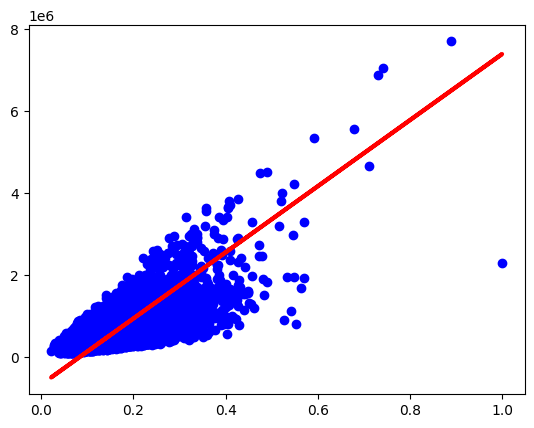

2949559793587547.0


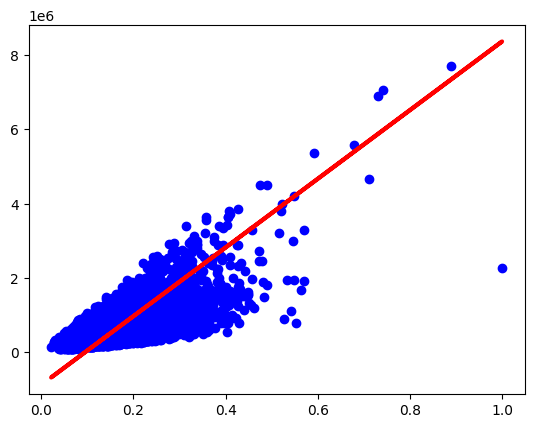

1.393709213605268e+16


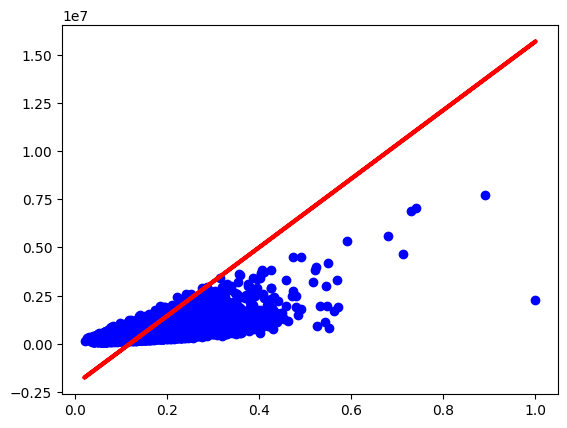

3.386801745527728e+18


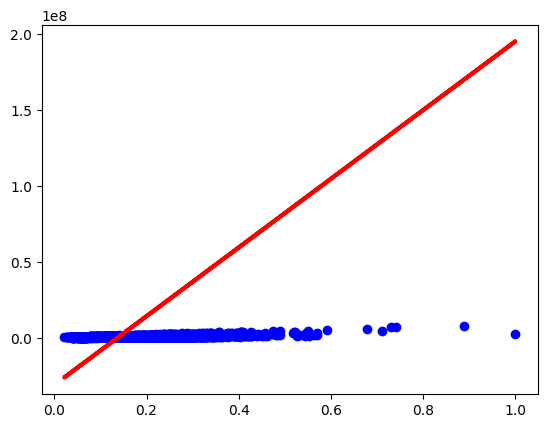

sqft_lot
1960132865547851.5


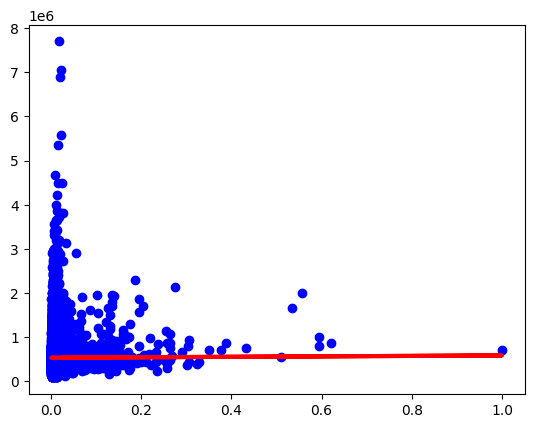

1959080148806921.0


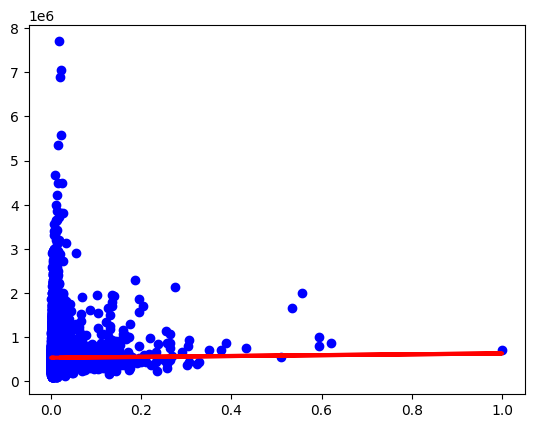

1958002616239313.5


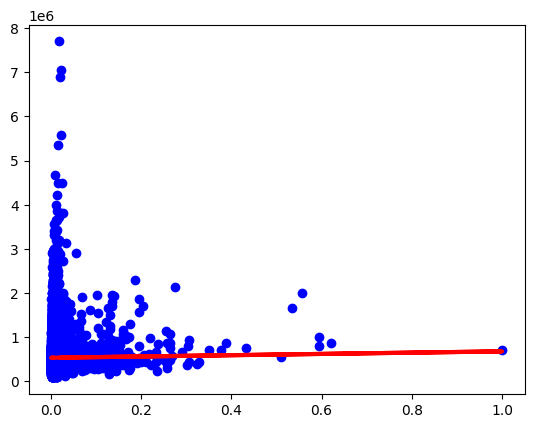

1956670721436980.2


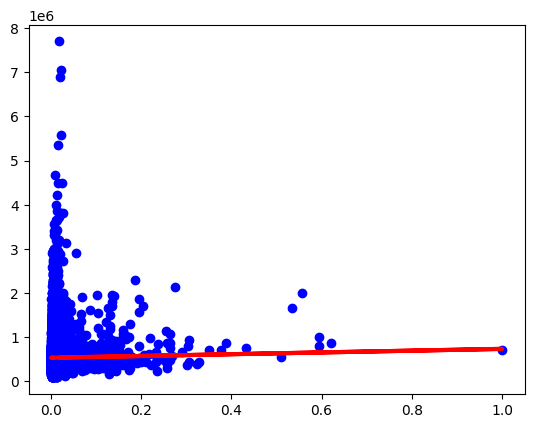

1954019968025744.5


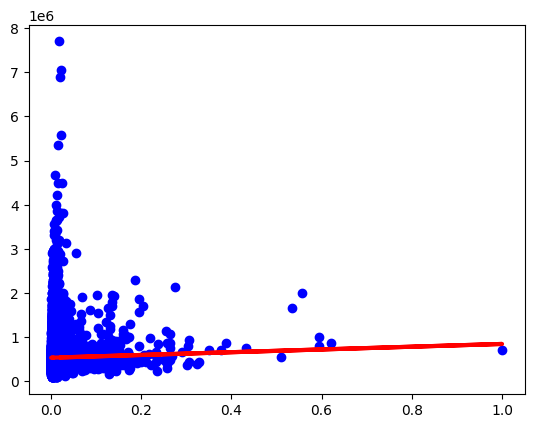

1946536240389449.5


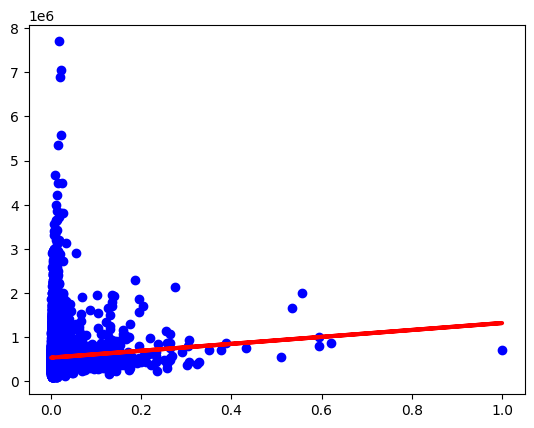

1945793794815145.0


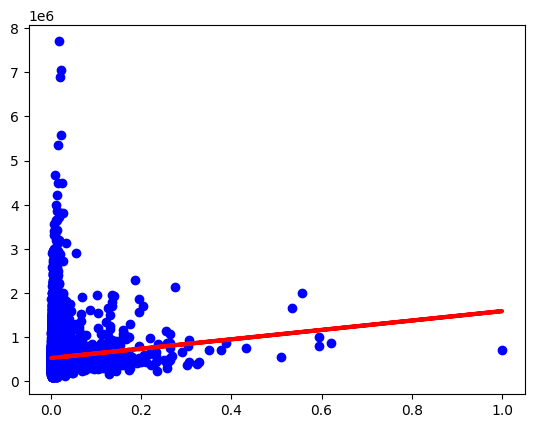

1958607880587359.0


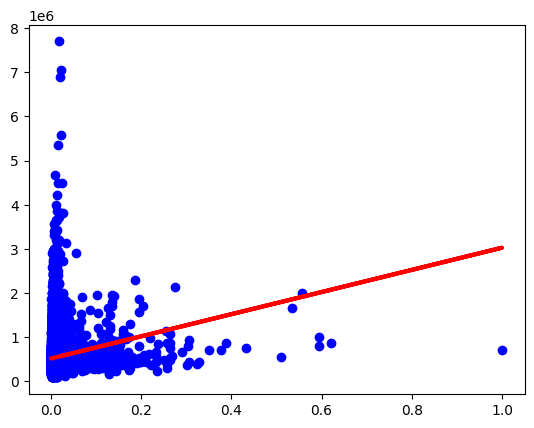

1.9118586585640144e+16


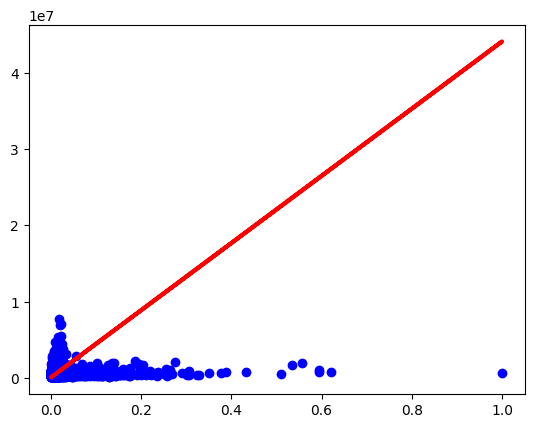

floors
1838919054488588.5


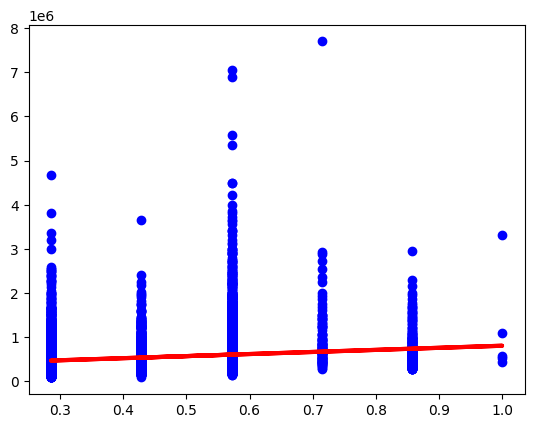

1833038668021160.5


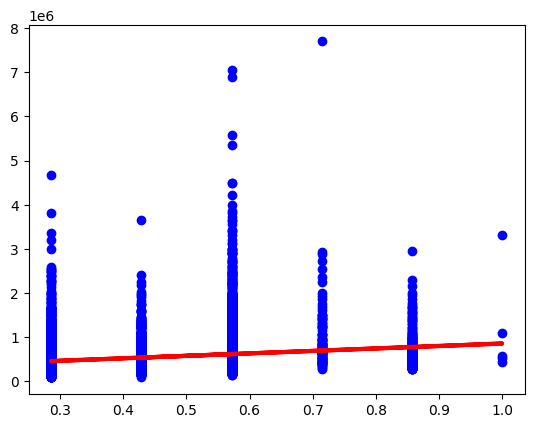

1832171041650232.2


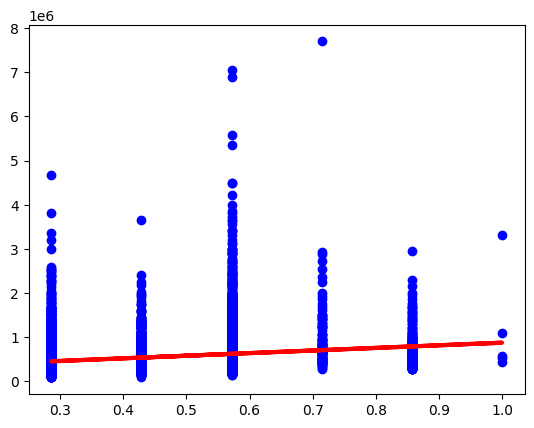

1831907658811916.2


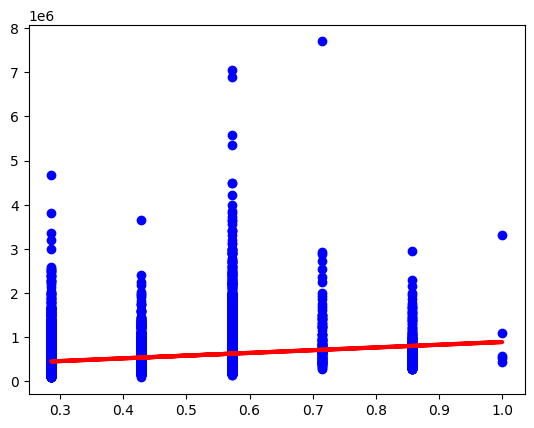

1833368683936247.0


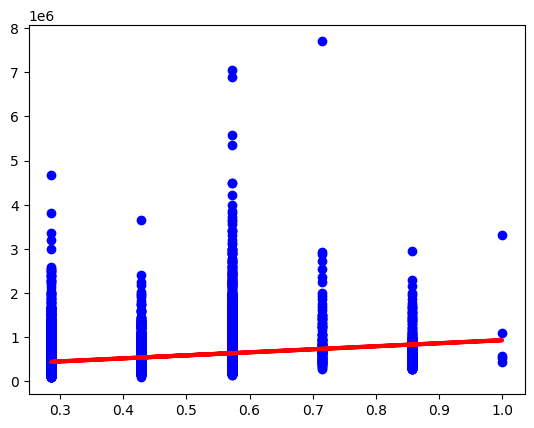

1876883654655438.0


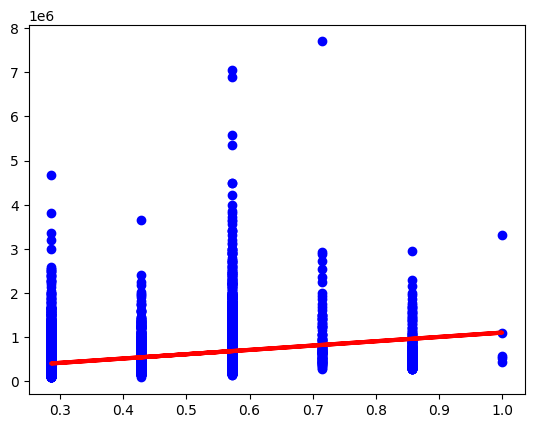

1848839141215447.0


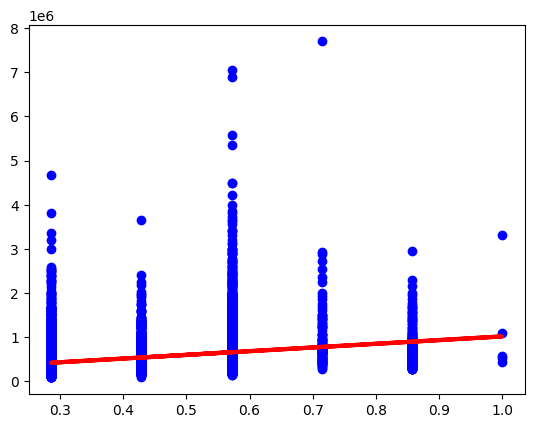

1909566926896706.5


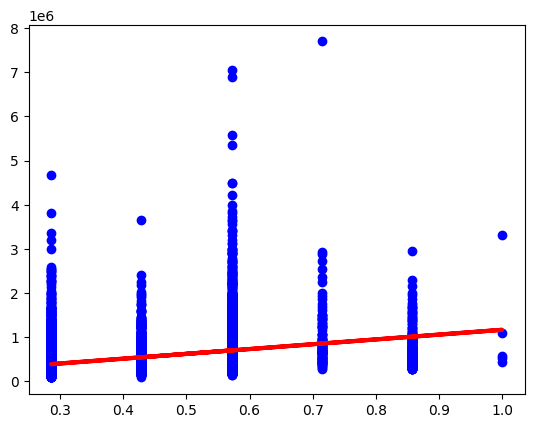

7734149140810354.0


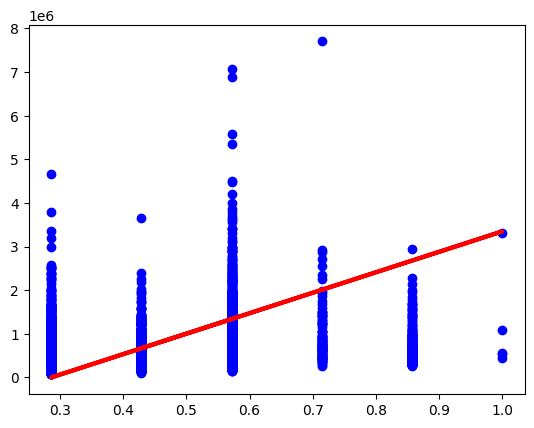

waterfront
1888747891877333.5


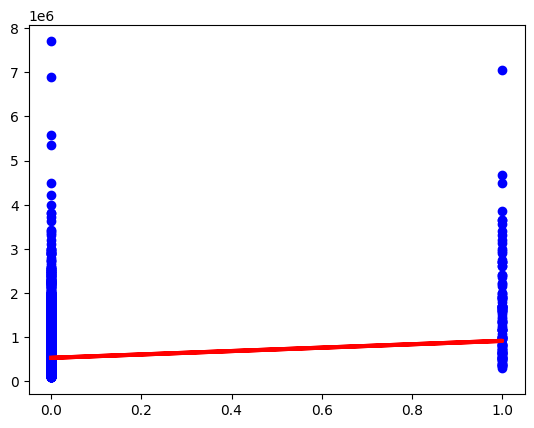

1859335618191998.8


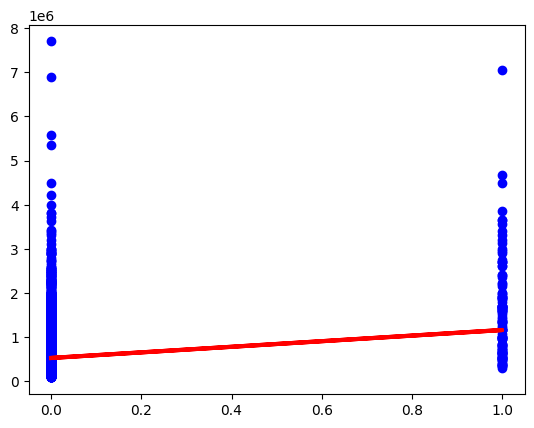

1846831370244559.5


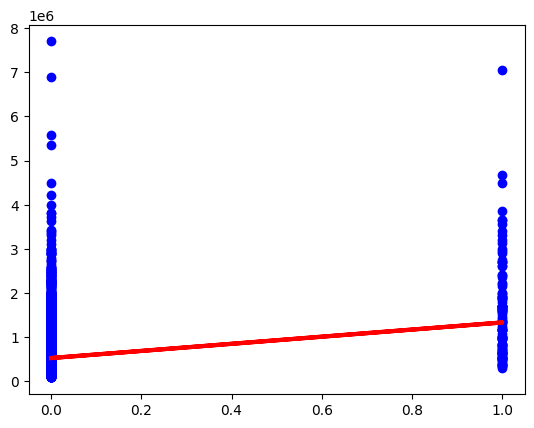

1841060686533409.8


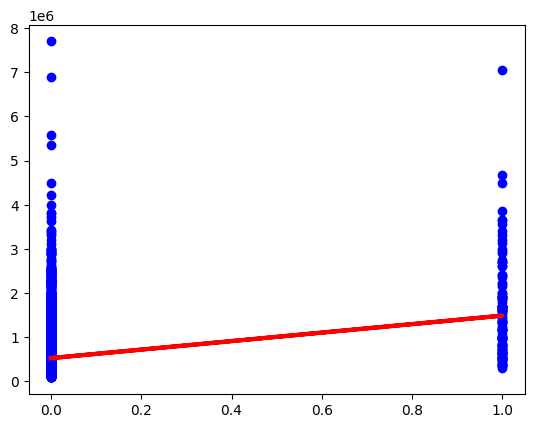

1844716699880867.0


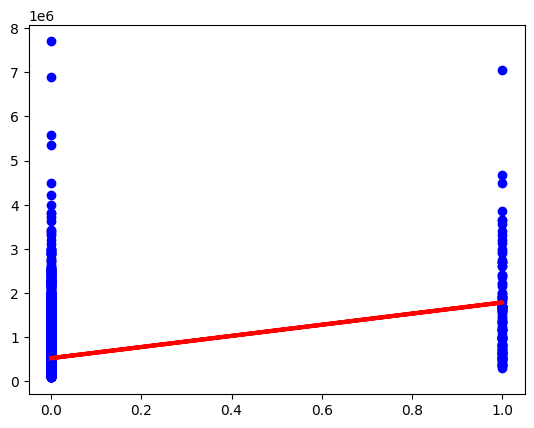

2073120548091347.5


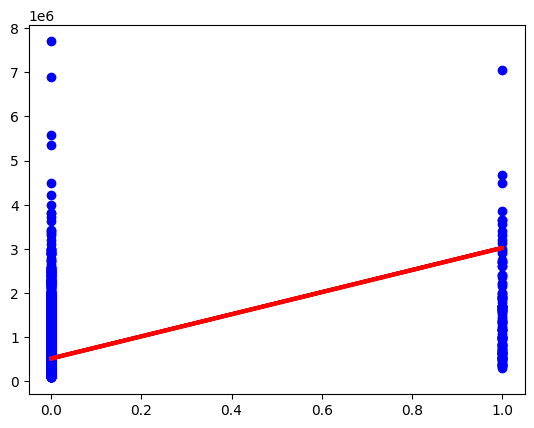

2101869342109255.2


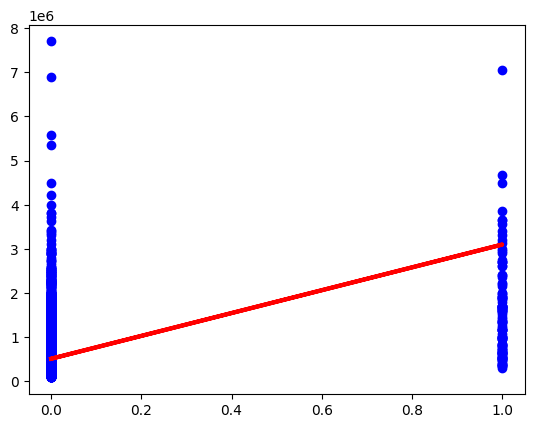

3184465810755015.0


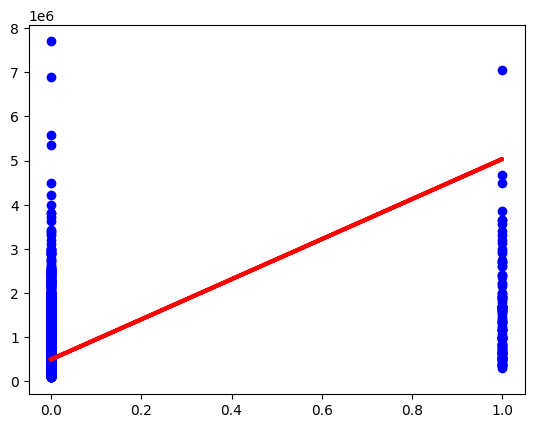

3.191686408175067e+17


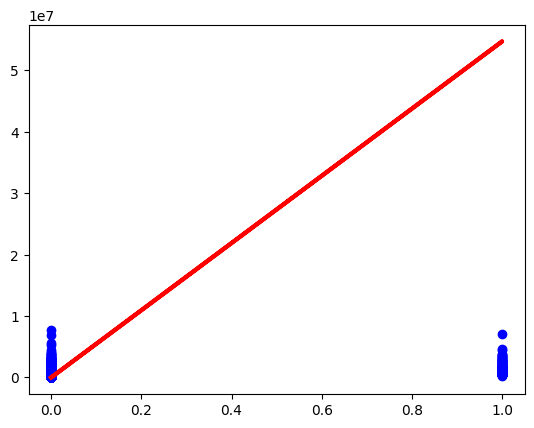

view
1669497270114967.0


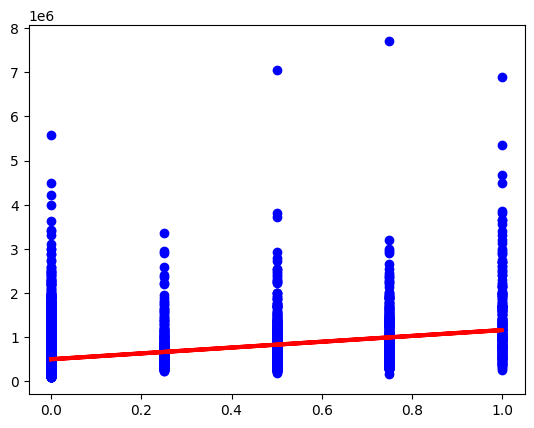

1665805680516294.8


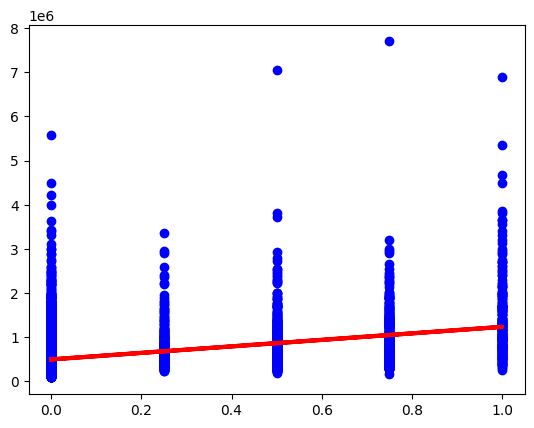

1665797403642314.5


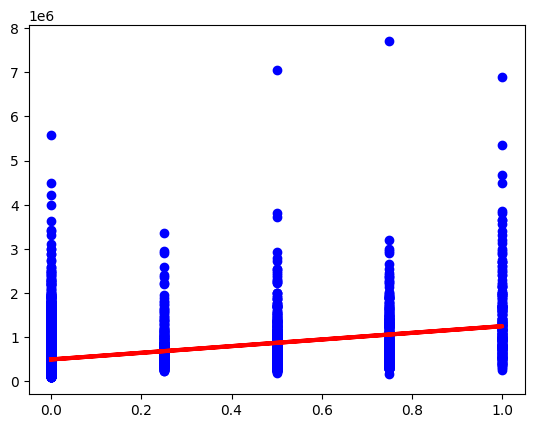

1666117428186560.5


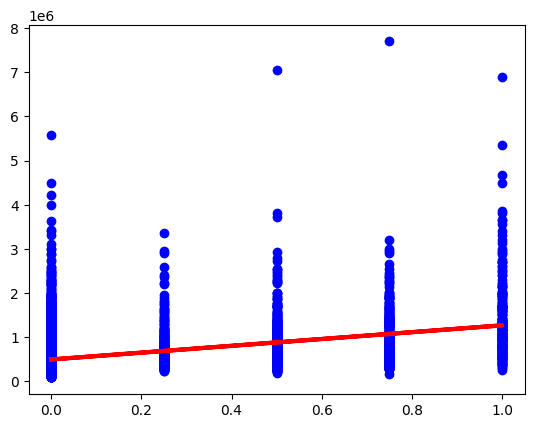

1670987042287461.2


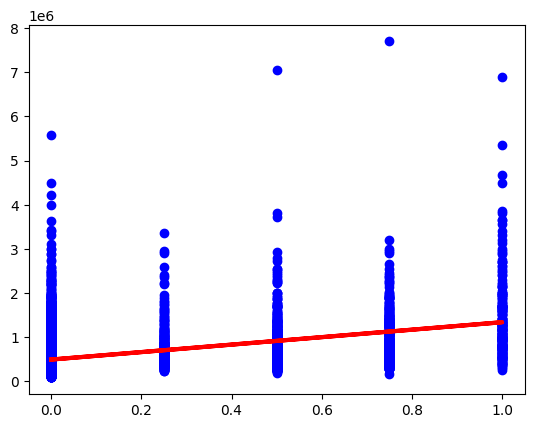

1746527965040735.5


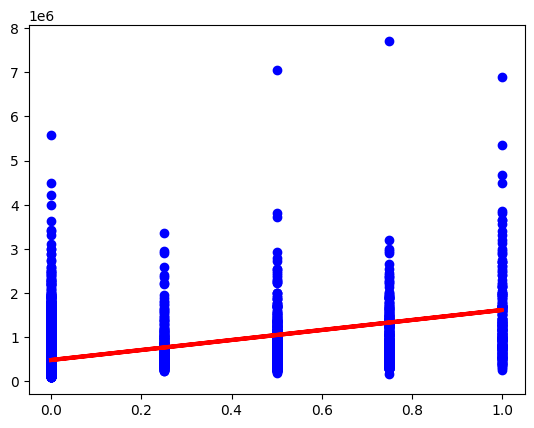

1679029698677414.8


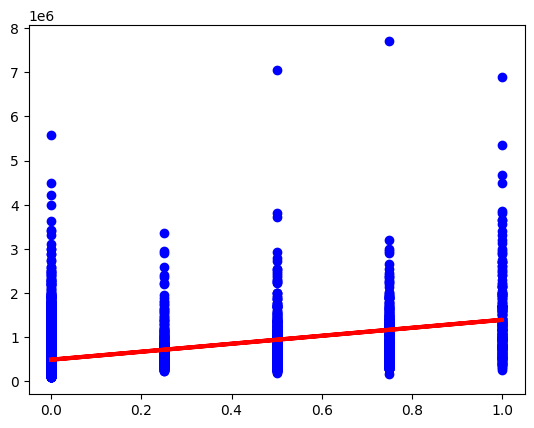

1753479429051864.2


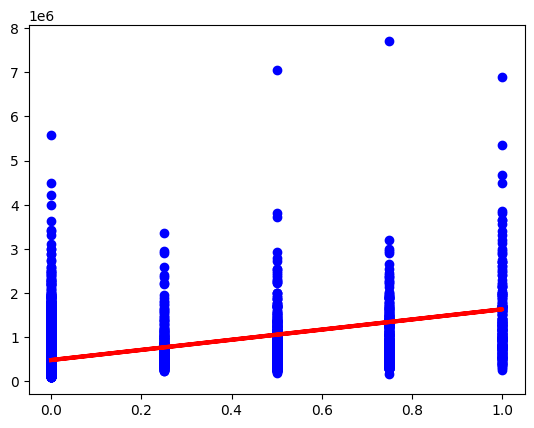

1.0401820003631572e+16


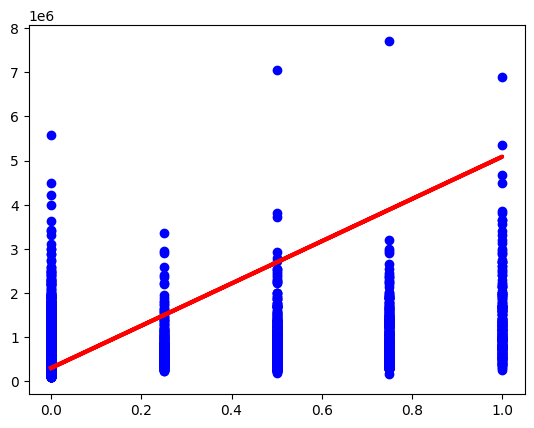

condition
1963151320742598.5


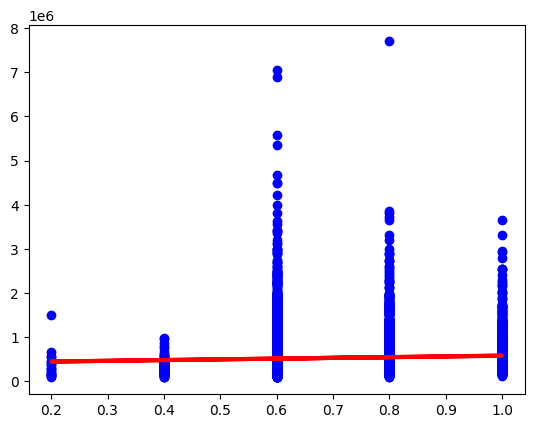

1962001543049204.5


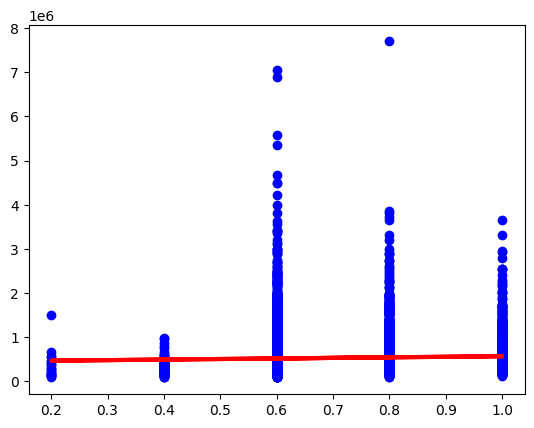

1961652433042030.5


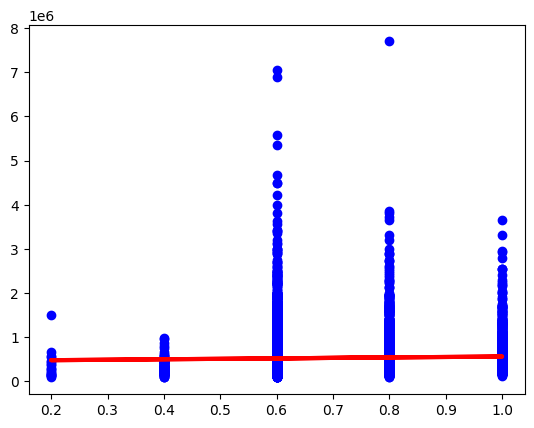

1961423370278009.5


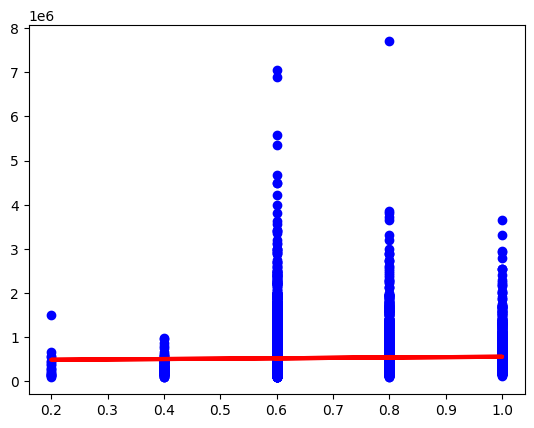

1961222248912847.5


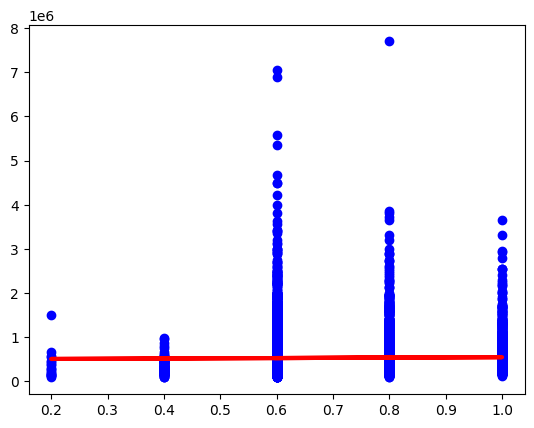

1966285701688628.5


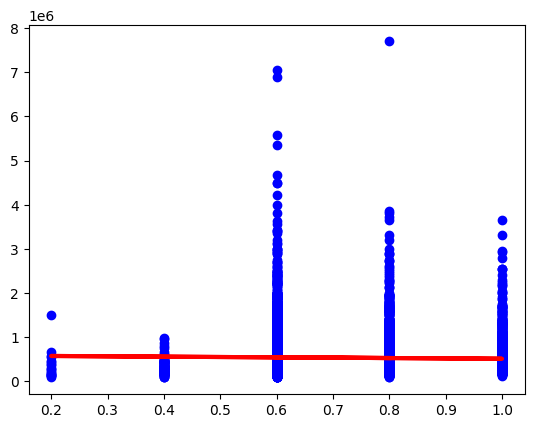

1965529491319455.0


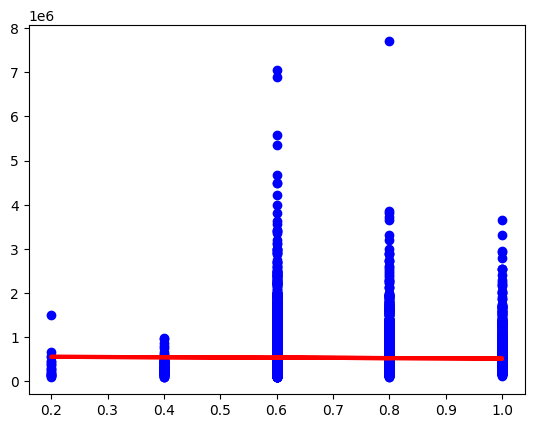

1970374386612227.0


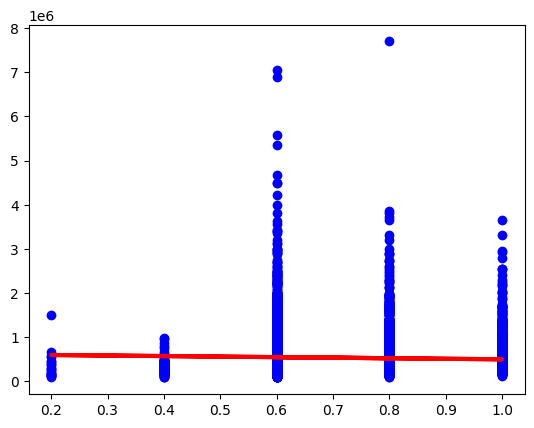

2017349540656977.0


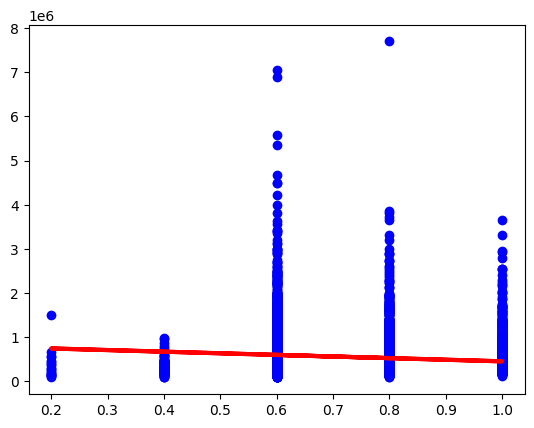

grade
1453261378761748.2


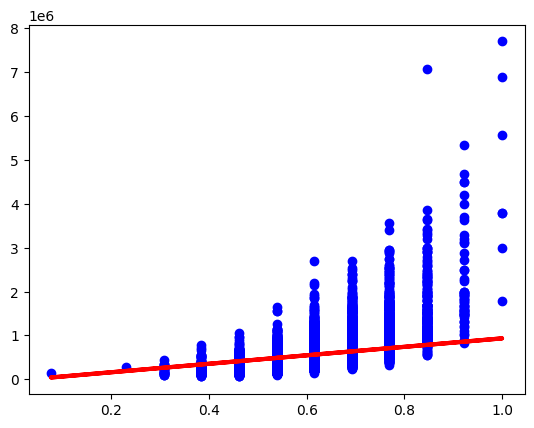

1270992692050780.8


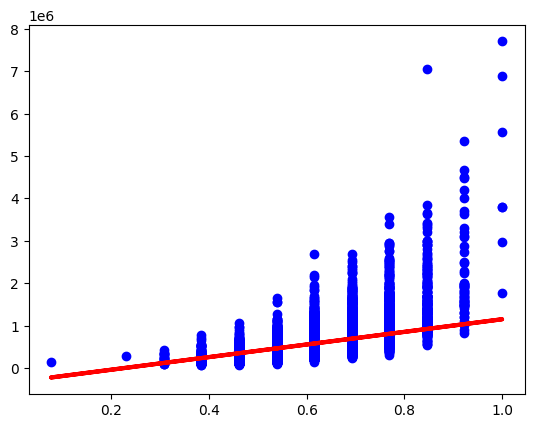

1177035265960373.0


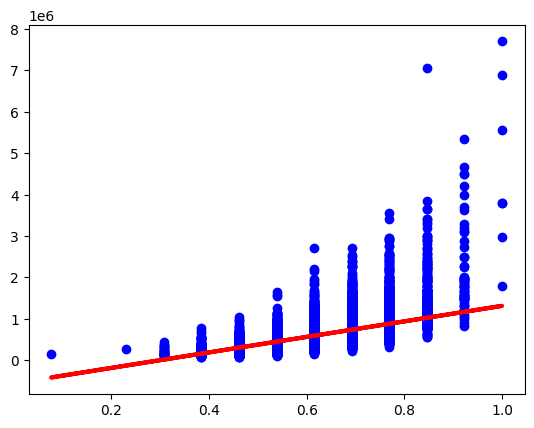

1124066187791893.2


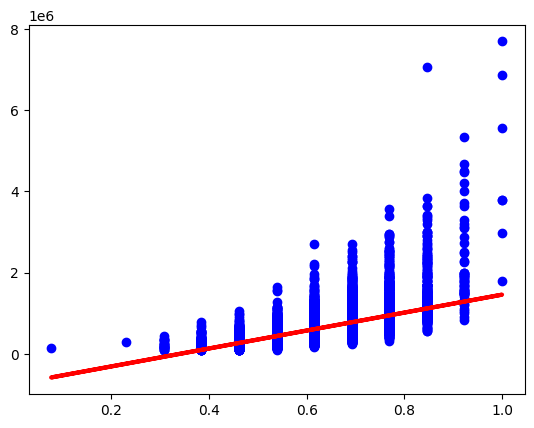

1097231779510664.8


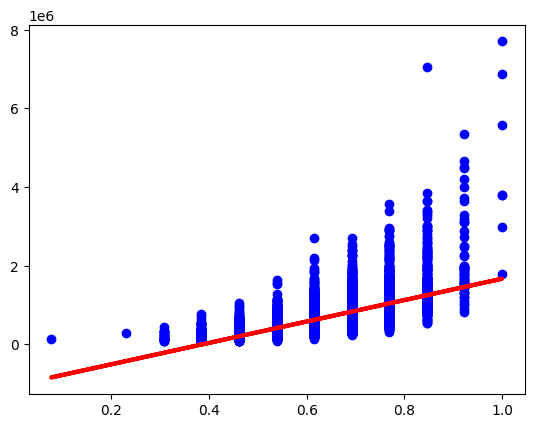

1385936325213407.8


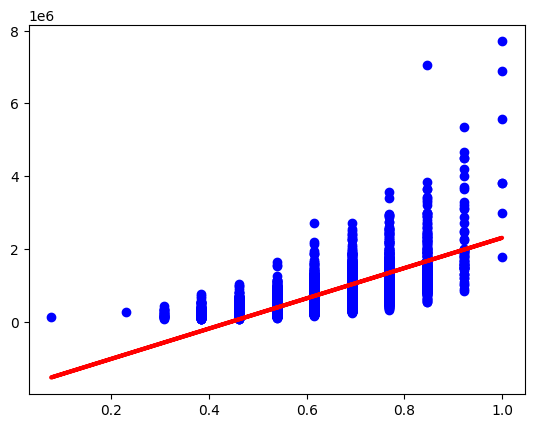

1394759577298988.0


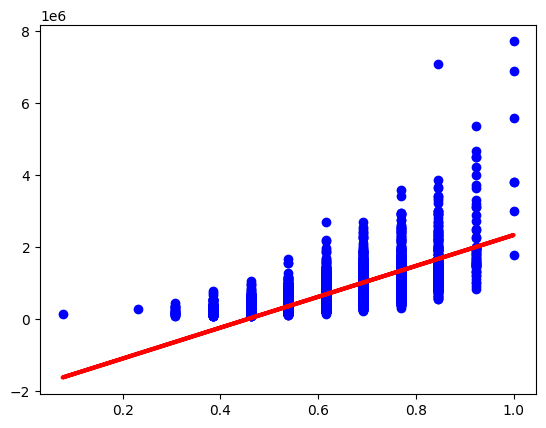

2356282962417831.0


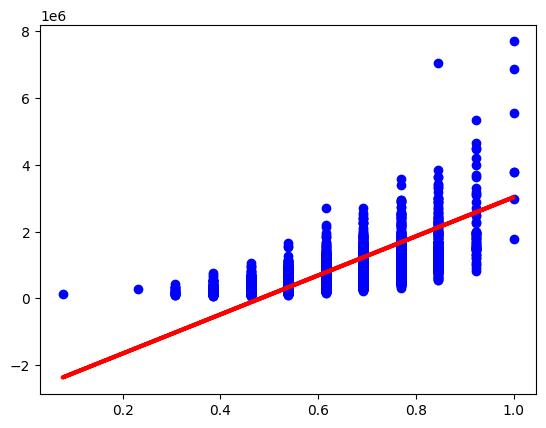

5.449747159752068e+16


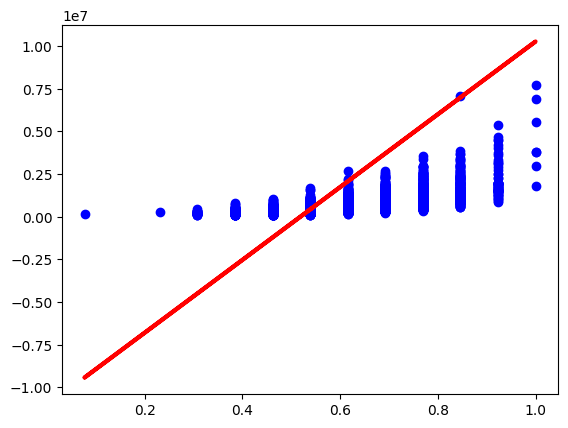

sqft_above
1525825531340019.5


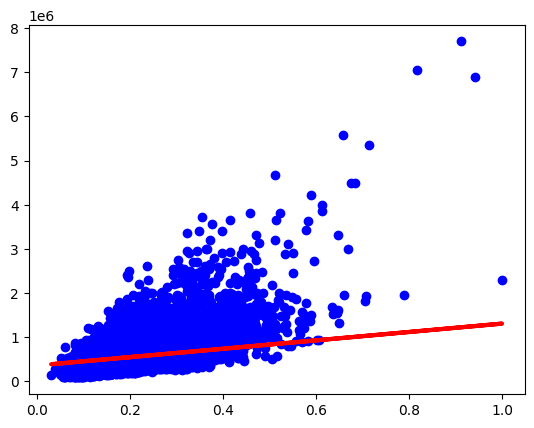

1362353829986292.5


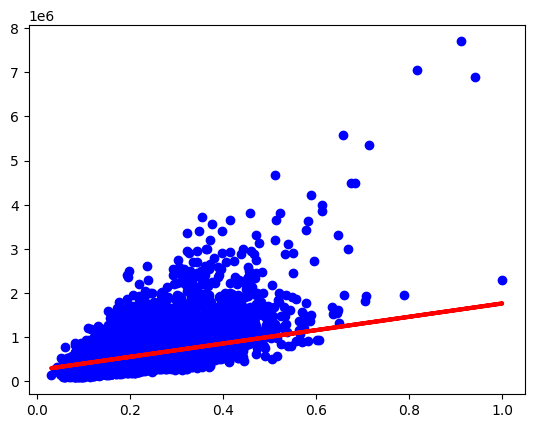

1289086892849050.0


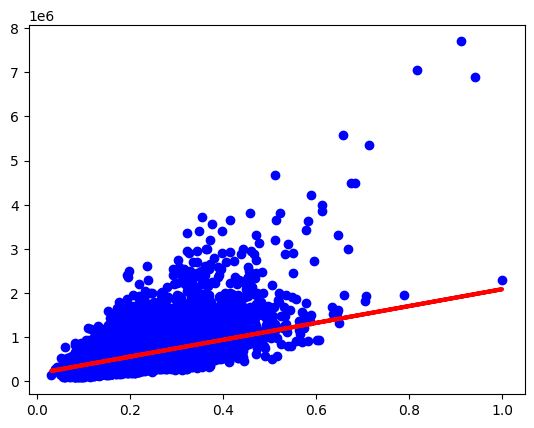

1252688833560128.0


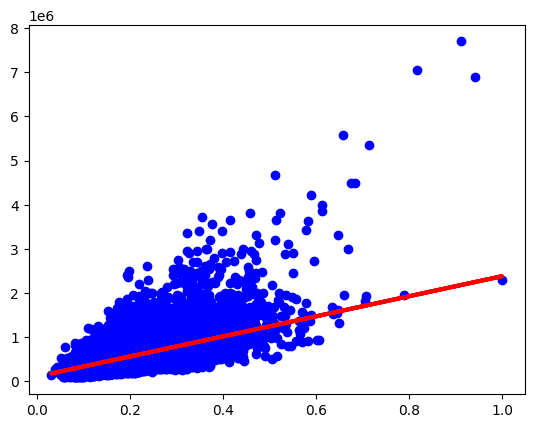

1264657276312646.0


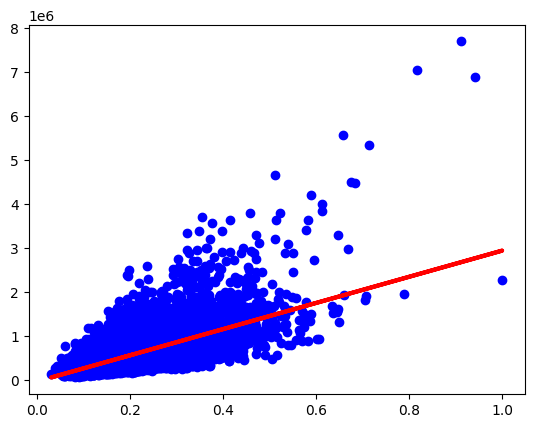

2412510069572463.5


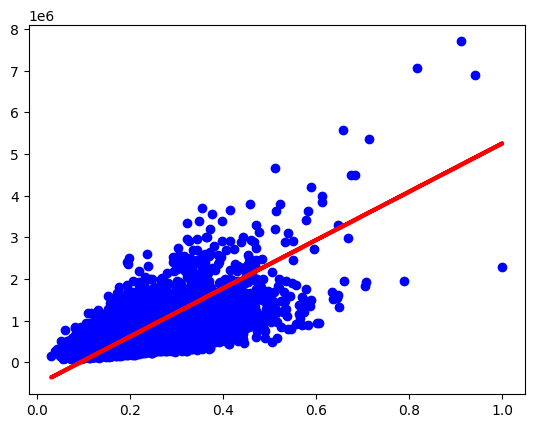

2550125824372112.5


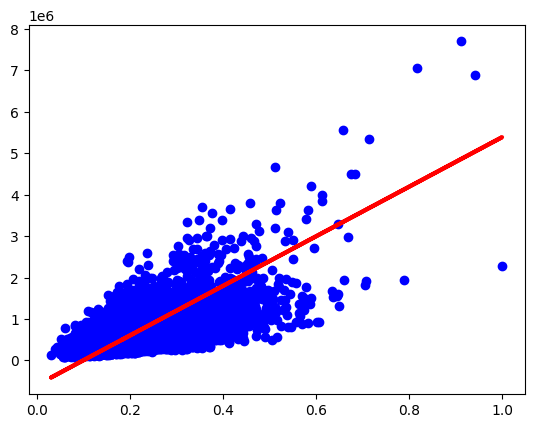

7755868193451996.0


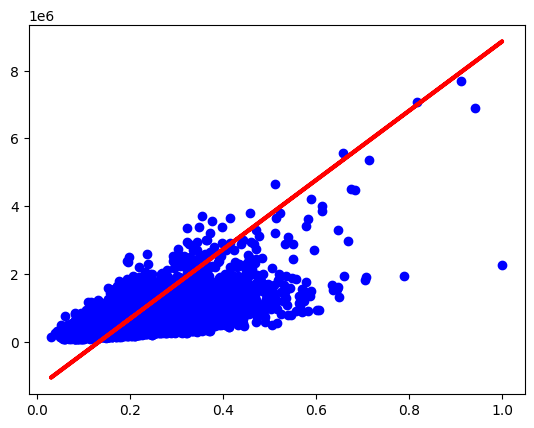

1.2188532807457715e+18


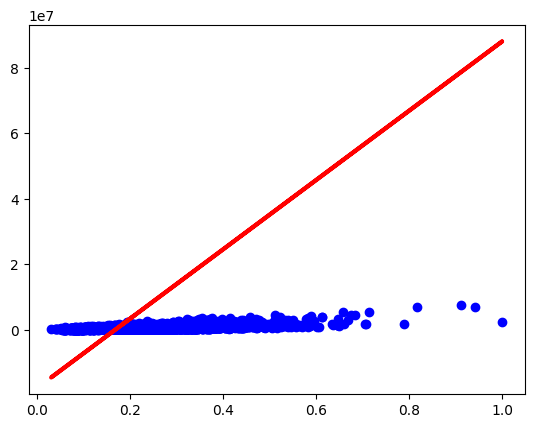

sqft_basement
1838095341466702.0


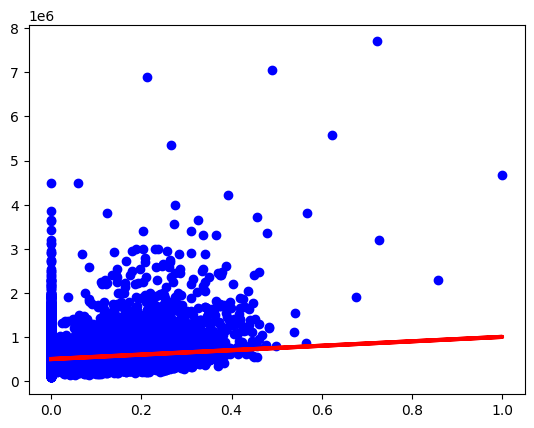

1794425434197918.5


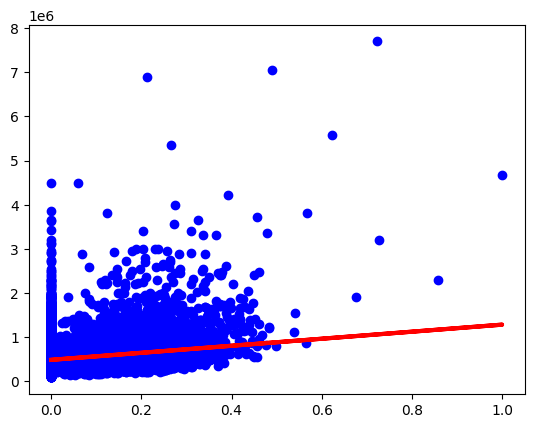

1777003781563236.0


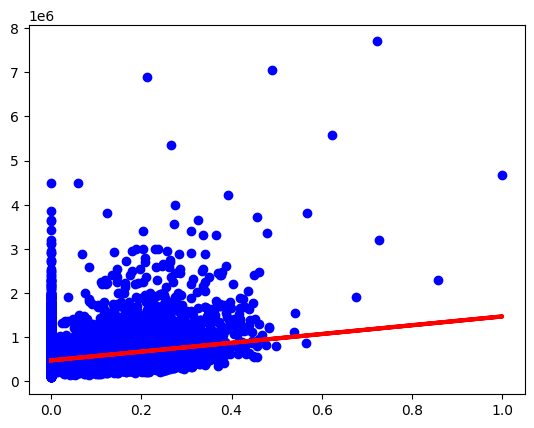

1769400047454910.0


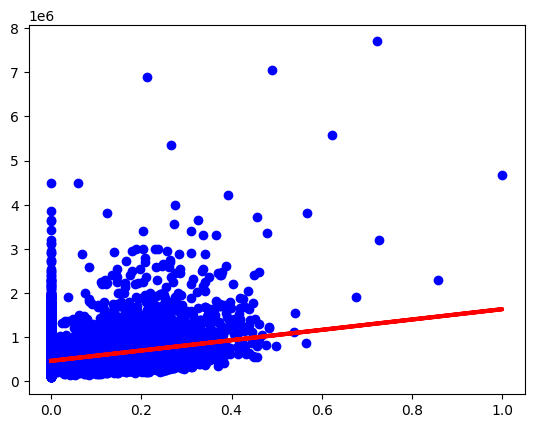

1775566320986467.2


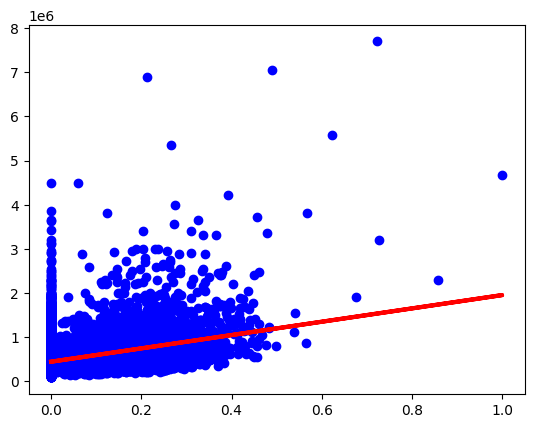

2103826152521133.2


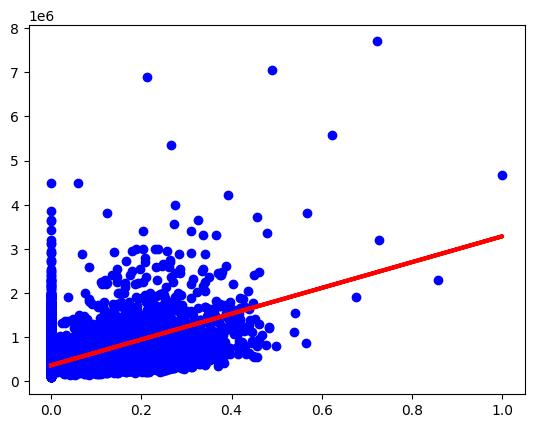

2116982343067850.8


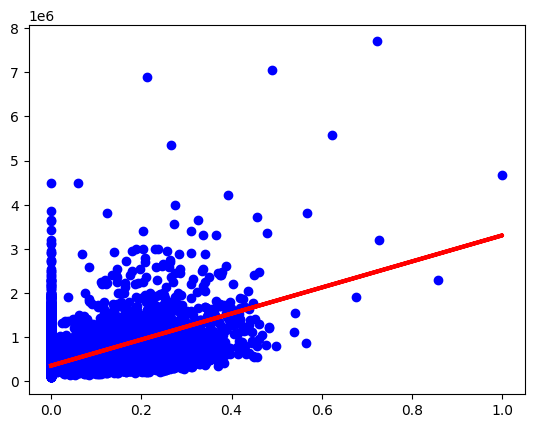

3508439982710337.0


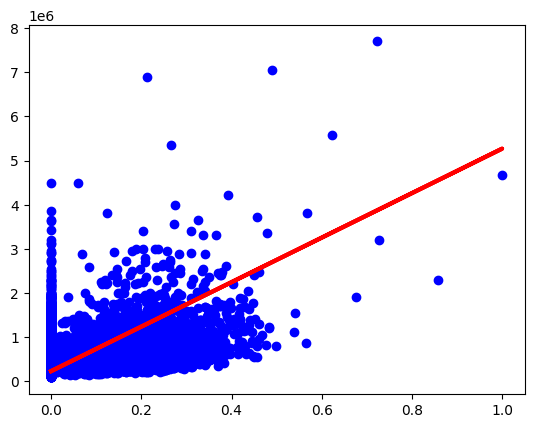

3.918742782691613e+17


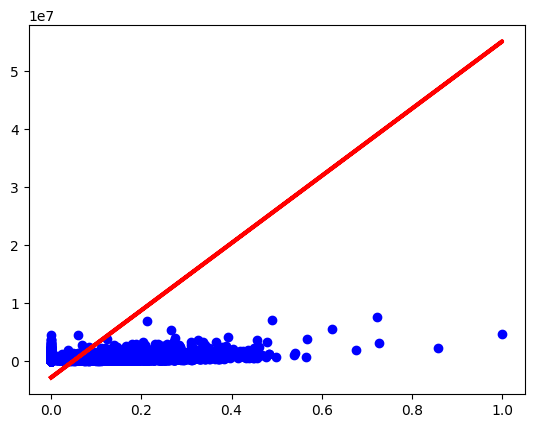

yr_built
1964053051476450.5


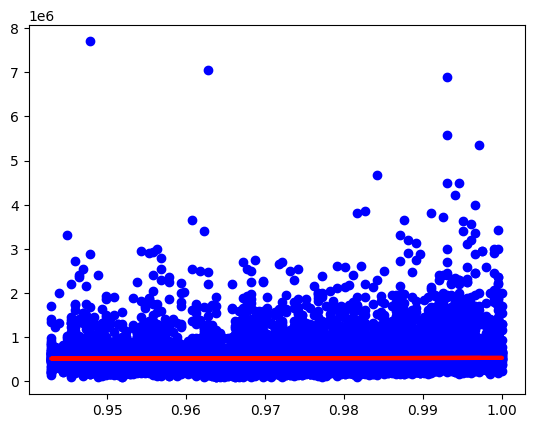

1963985299777842.5


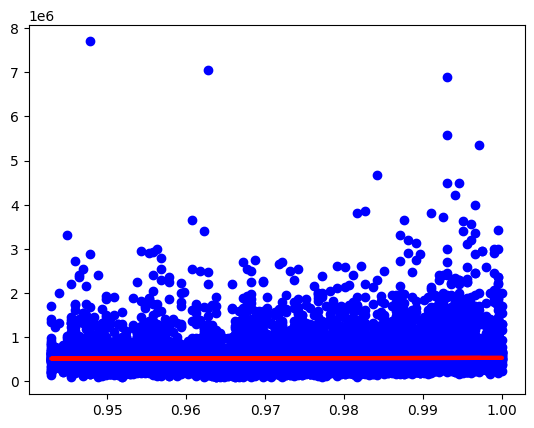

1963873336847555.2


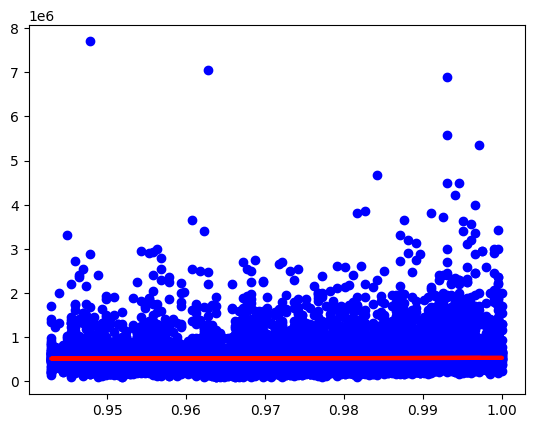

1963642127609430.5


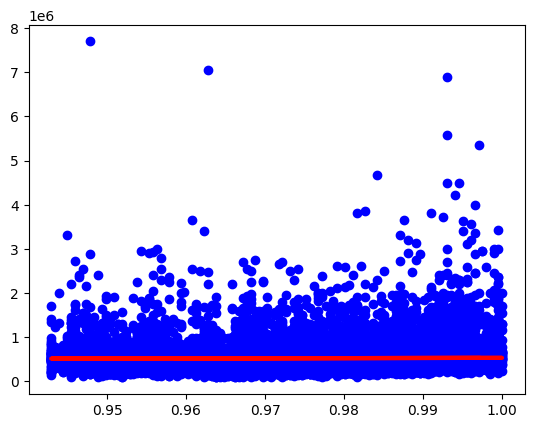

1962947813886330.2


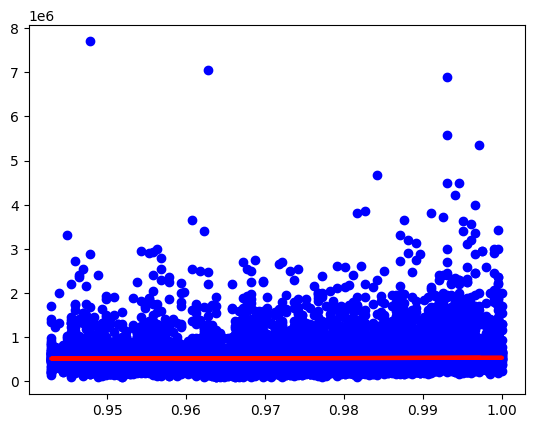

1960935754041025.0


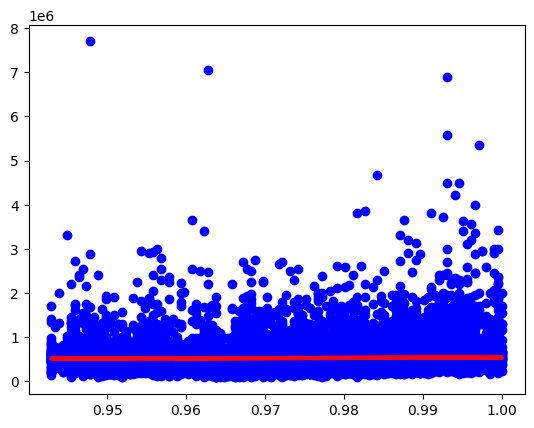

1962106830777243.0


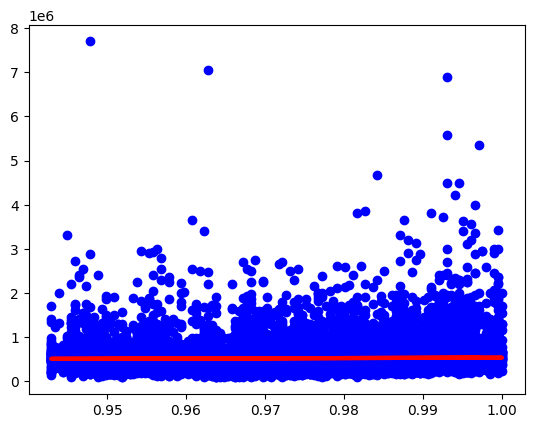

1958471210466705.0


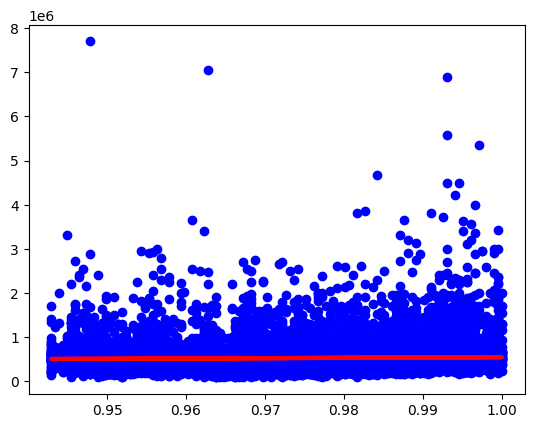

1981018333817814.2


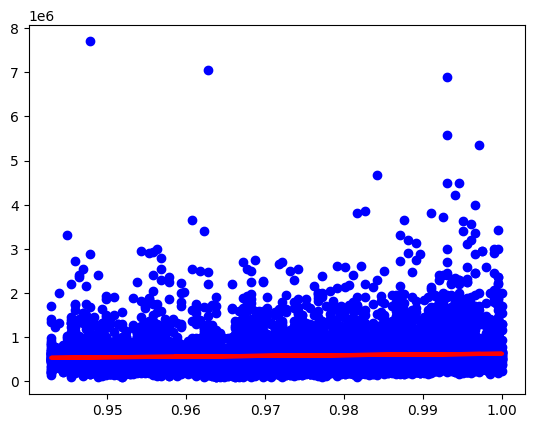

yr_renovated
1932058163699043.5


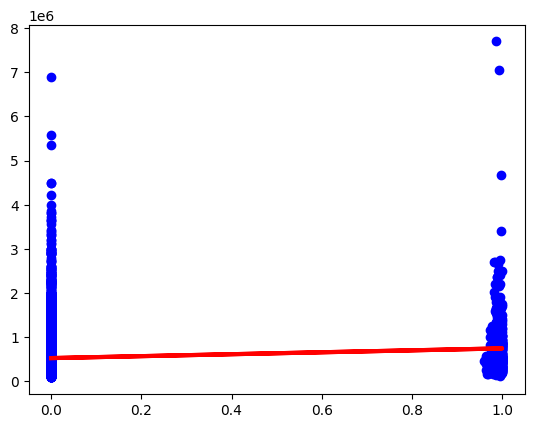

1932184171968937.8


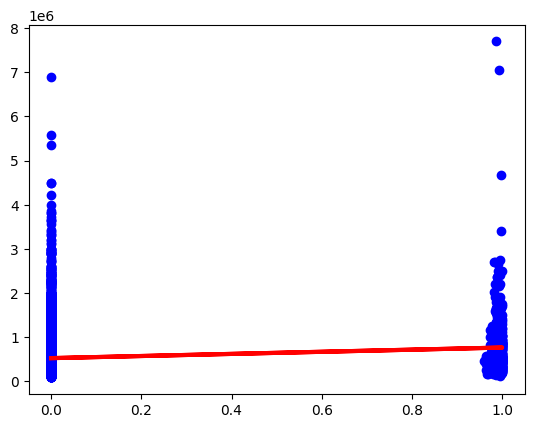

1932198269984640.0


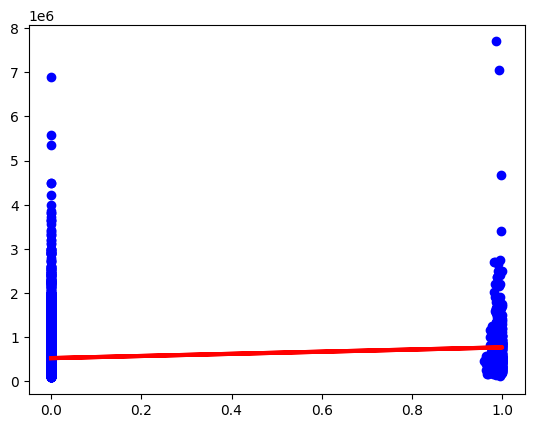

1932162070444281.2


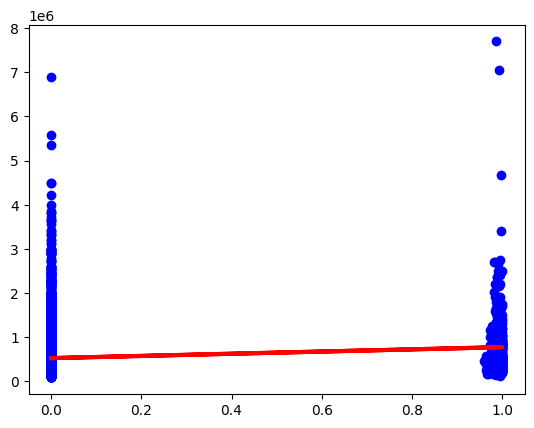

1932374783661433.5


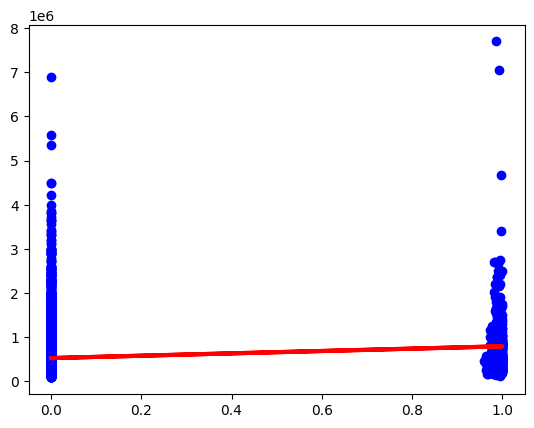

1938063011571857.5


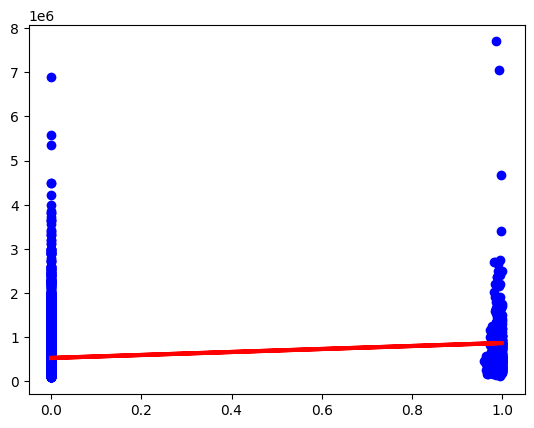

1933052162702841.2


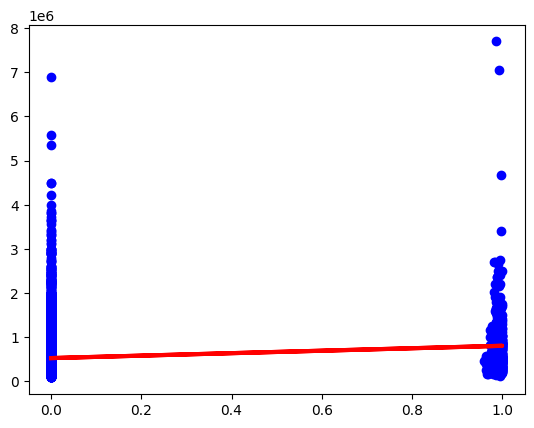

1938439057161422.5


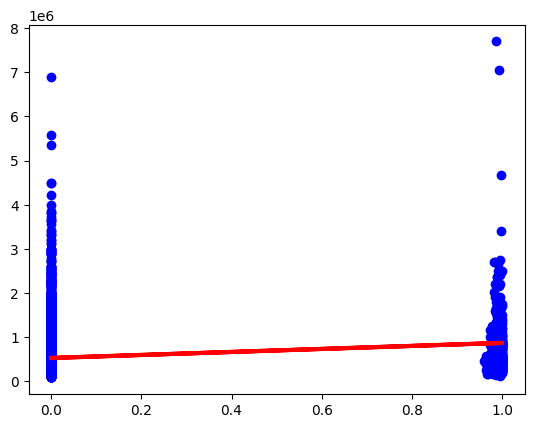

2491984785974293.0


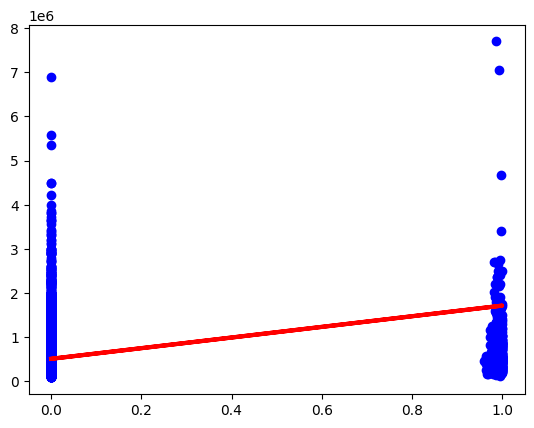

bathrooms_rounded
1603030355877373.8


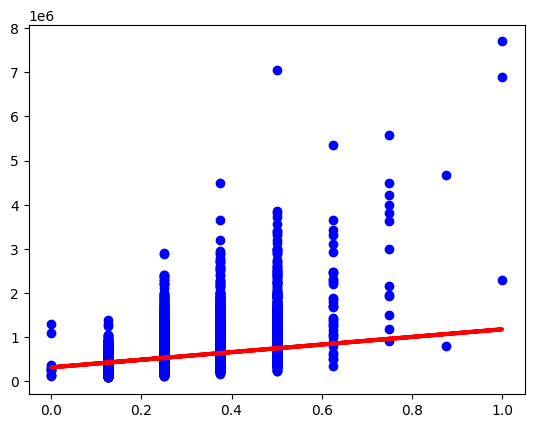

1491614270271746.8


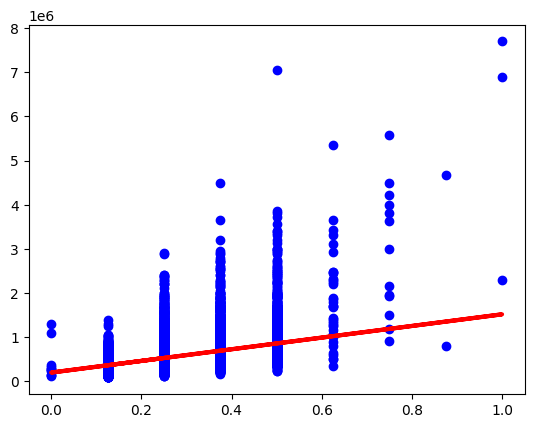

1447433684215955.0


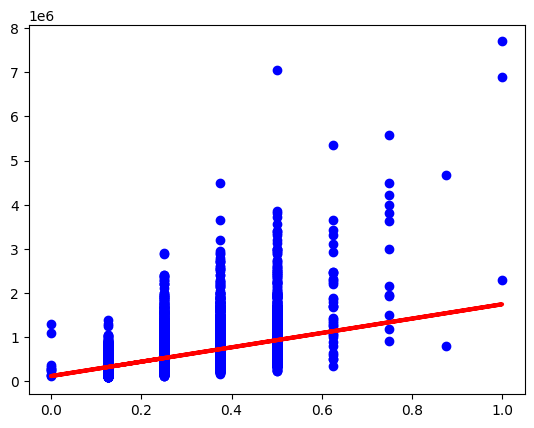

In [ ]:
for i in domy_train:
    W = np.zeros([2])
    print(i)
    W = my_lasso_regression(domy_train[i].reset_index(drop=True), ceny_train.reset_index(drop=True), W)

domy_new_train, domy_new_test = train_test_split(domy_nowe_cechy, test_size=0.33, random_state=numer_indeksu)

for i in domy_nowe_cechy:
    W = np.zeros([2])
    print(i)
    W = my_lasso_regression(domy_new_train[i].reset_index(drop=True), ceny_train.reset_index(drop=True), W)